# Figures for HGT Paper

## Section 2A - Var Mutagens - split violin plots of mutagen instruction use in static/CE 

In [203]:
def twoAPlot(field,name):
    ## Section 2A - Violin Plots

    subset2 = grab_set(series="BA-1", ts=treatments)
    #extract_stats(subset2, "hgt.dat.gz", "uptake", "7", verbose=False, dont_overwrite=True)
    extract_stats(subset2, "hgt.dat.gz", name, field, verbose=False, dont_overwrite=True)
    #basic_violin(subset2, "uptake", hue="Env")


    ################
    #df = import_data(subset2, "uptake")
    df = import_data(subset2, name)
    #print df.head()

    def tidy_name(row):
        mutname = row['MutType']
        flavor = row['Flavor']
        env = row['Env']

        if env == "SerialTransfer":
            env = "Ser.\nTrans."
        elif env == "Bottleneck":
            env = "Bot.\nNeck"


        name = mutname + "\n" + env + "\n" + flavor
        name = name.replace("Bottleneck","Bot.\nNeck")    
        return name


    #df['Mutagen Type'] = df['MutType'] + "\n" + df.apply(lambda row: row['Flavor'] if row['Flavor'] != "None" else "", axis=1)
    df['Mutagen Type'] = df.apply(lambda row: tidy_name(row), axis=1)
    #print df.head()

    # huebit = df["Env"].dropna().unique().tolist()  
    # pal_v = {}
    # pal_s = {}

    # if len(huebit) > 0:
    #     v_colors = ['r','b', 'y']
    #     s_colors = ['y', 'g', 'r']

    #     for v, i in zip(huebit , range(len(huebit))):
    #         pal_v[v] = v_colors[i]
    #         pal_s[v] = s_colors[i]     

    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=2)
    sns.plt.rcParams['figure.figsize'] = (16, 8)



    ax = sns.violinplot(x="Mutagen Type", y="Value", #hue="Env", 
                        data=df, 
                        #split=True, 
                        scale="count", 
    #                    scale_hue=True, 
                        bw=.3, 
                        inner="quart", 
                        #palette=pal_v
                       )
    sns.swarmplot(x="Mutagen Type", y="Value", #hue="Env", 
                  data=df,
                  linewidth=1,
                 #split=True,
                 #palette=pal_s
                 )        

    sns.plt.title(name)
    sns.plt.xlabel("Mutagen Instruction")
    sns.plt.ylabel(name)
    #sns.plt.ylim([0,300000000])
    #sns.plt.ylim([0,140000])

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Static Environment","Changing Environment"], loc='upper right')

    import matplotlib.pyplot as plt
    import matplotlib.ticker as tkr

    def func(x, pos):  # formatter function takes tick label and tick position
        s = '%d' % x
        if s == "0":
            return 0
        if x >= 1000000:
            return s[:-6] + "m"
        elif x >= 10000:
            return s[:-3] + "k"
        else:
            return s

    y_format = tkr.FuncFormatter(func)  # make formatter
    ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

    plt.show()
    
    

Extract Stats: hgt.dat.gz field: inst_execs ( 10 ) -  mean
Extracting: ++++++++++++++ Done


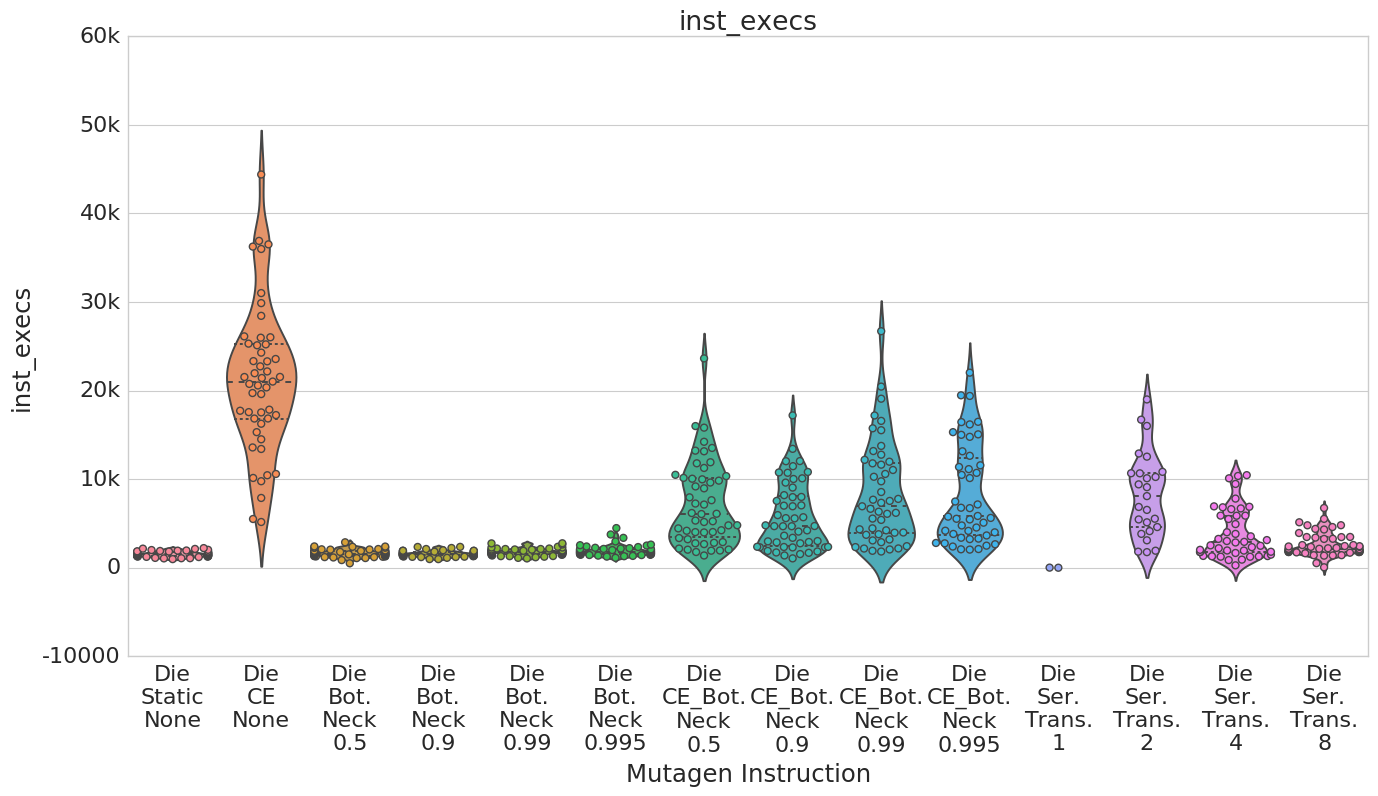

In [206]:
twoAPlot(10, "inst_execs")

Extract Stats: hgt.dat.gz field: uptake ( 7 ) -  mean
Extracting: ,,,,,,,,,,++++ Done


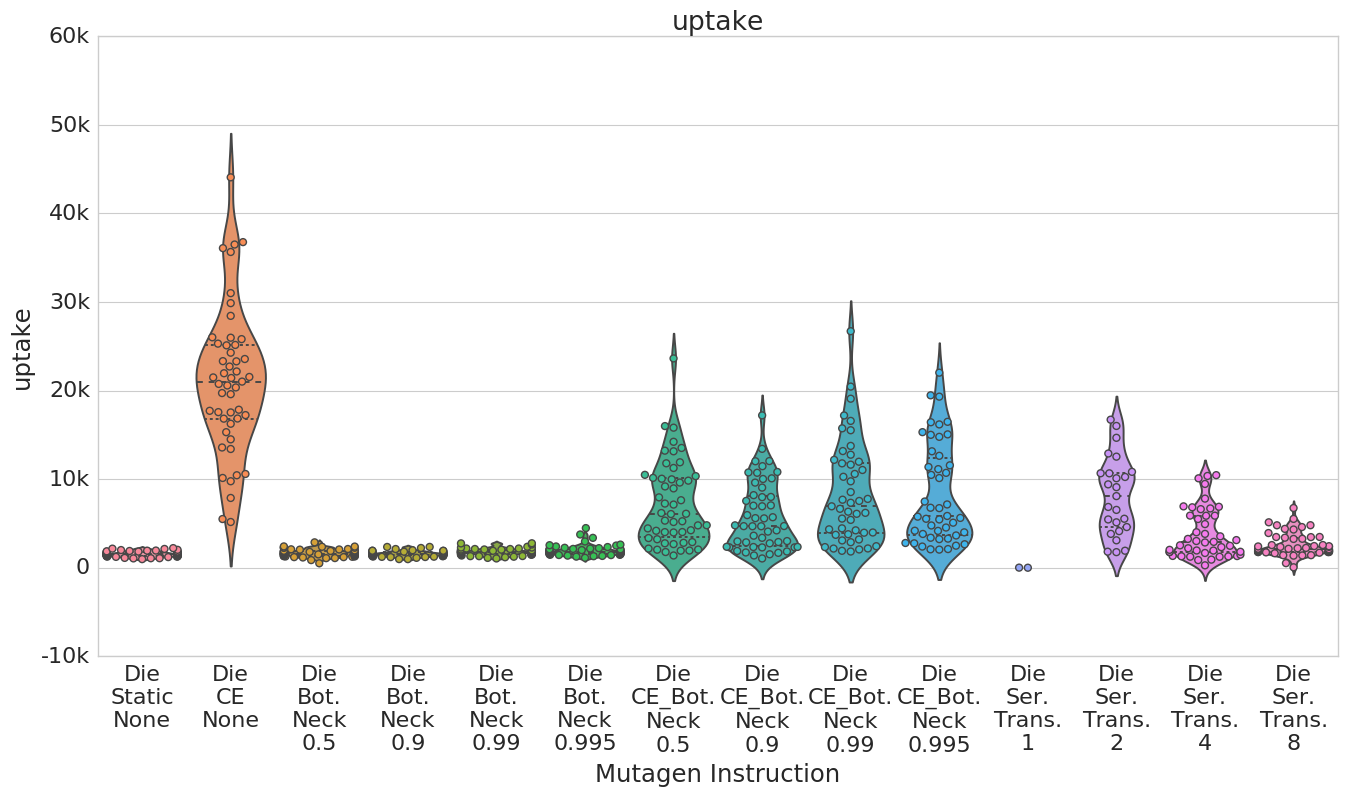

In [199]:
twoAPlot(7, "uptake")

Extract Stats: hgt.dat.gz field: completed_events ( 12 ) -  mean
Extracting: ++++++++++++++ Done


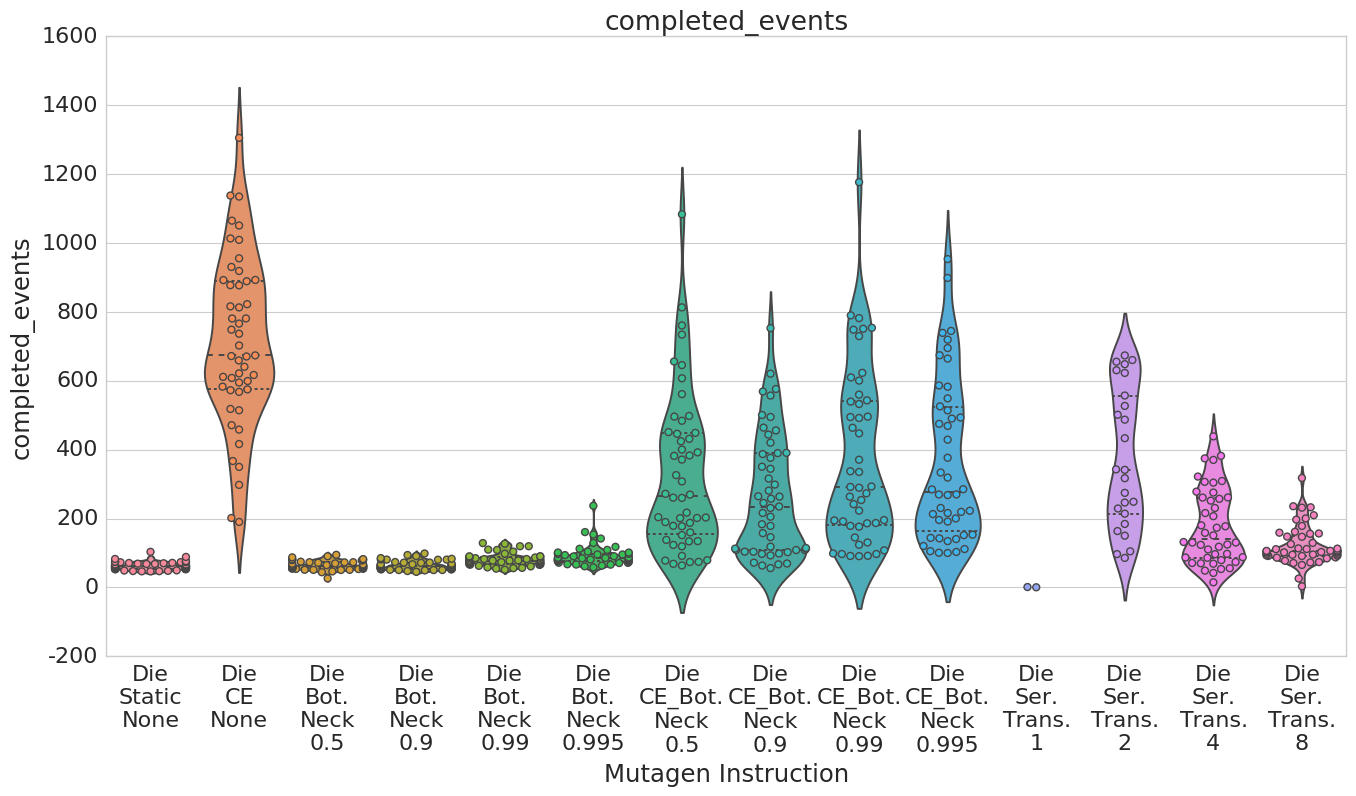

In [205]:
twoAPlot(12, "completed_events")

# Sanity Checks and Data Overview

In [24]:
analysis_sets = {
        "all": treatments,
        "AC-1": grab_set(series="AC-1", ts=treatments),
        "AC-2": grab_set(series="AC-2", ts=treatments),
        "AC-3": grab_set(series="AC-3", ts=treatments),
}

## Fitness

Extract Stats: average.dat.gz field: fitness ( 4 ) -  mean
Extracting: +++++++++++++++++++++++ Done


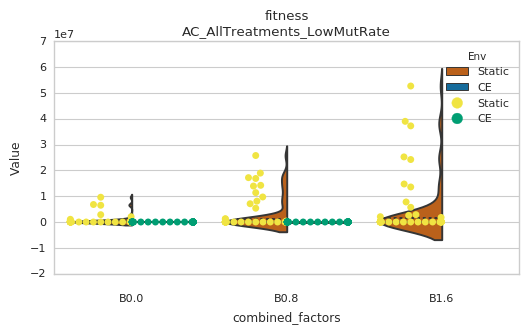

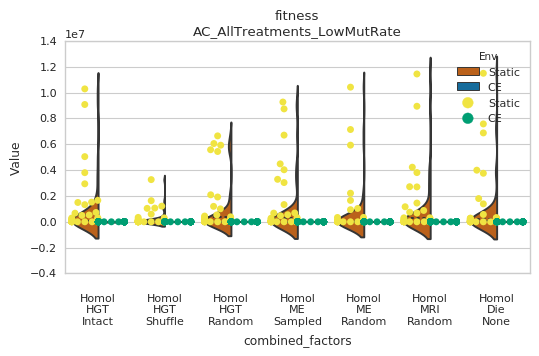

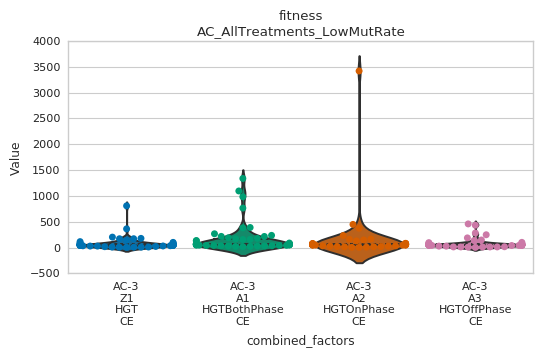

In [26]:
extract_stats(treatments, "average.dat.gz", "fitness", 4, verbose=False)
basic_violin(analysis_sets['AC-1'], "fitness", width=6, height=3, font_scale=1, hue="Env")
basic_violin(analysis_sets['AC-2'], "fitness", width=6, height=3, font_scale=1, hue="Env")
basic_violin(analysis_sets['AC-3'], "fitness", width=6, height=3, font_scale=1)

## HGT Uptakes

Extract Stats: hgt.dat.gz field: uptakes ( 7 ) -  mean
Extracting: ,,,,,,,,,,,,,,,,,,,,,,, Done


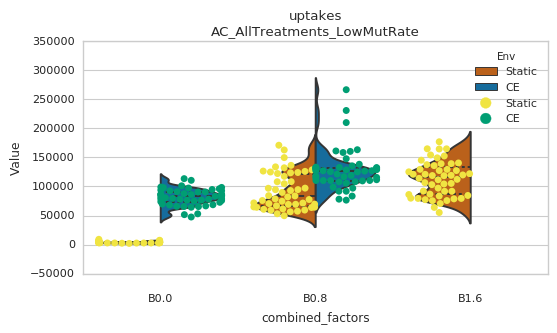

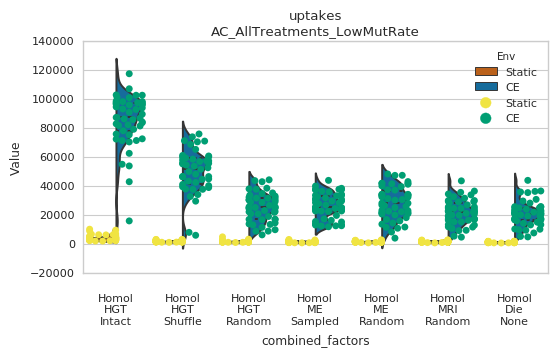

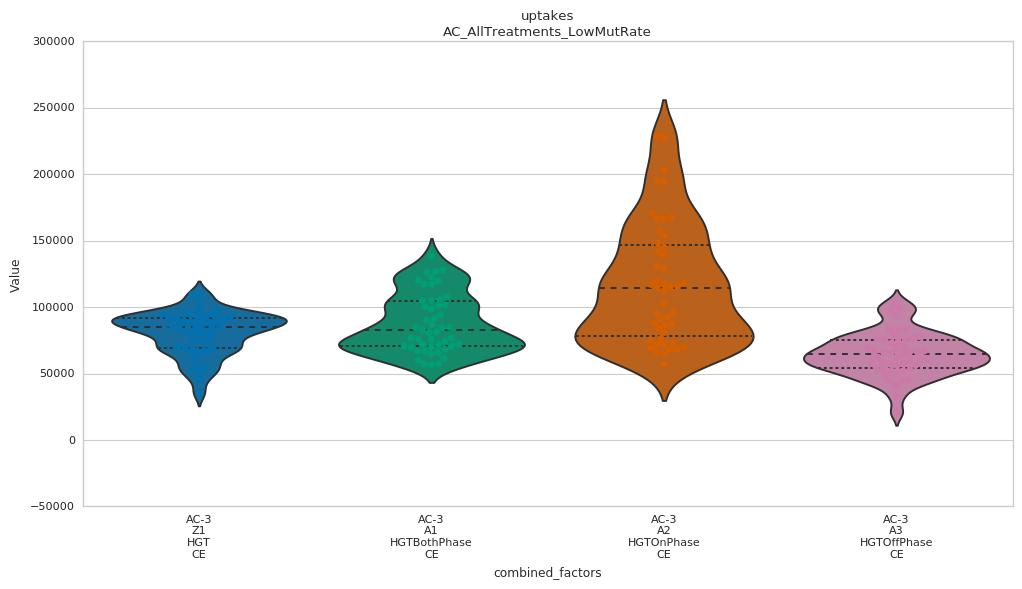

In [42]:
extract_stats(treatments, "hgt.dat.gz", "uptakes", 7, verbose=False, dont_overwrite=True)
basic_violin(analysis_sets['AC-1'], "uptakes", width=6, height=3, font_scale=1, hue="Env")
basic_violin(analysis_sets['AC-2'], "uptakes", width=6, height=3, font_scale=1, hue="Env")
basic_violin(analysis_sets['AC-3'], "uptakes", width=12, height=6, font_scale=1)

Extract Stats: hgt.dat.gz field: recomb ( 8 ) -  mean
Extracting: +++++++++++++++++++++++ Done


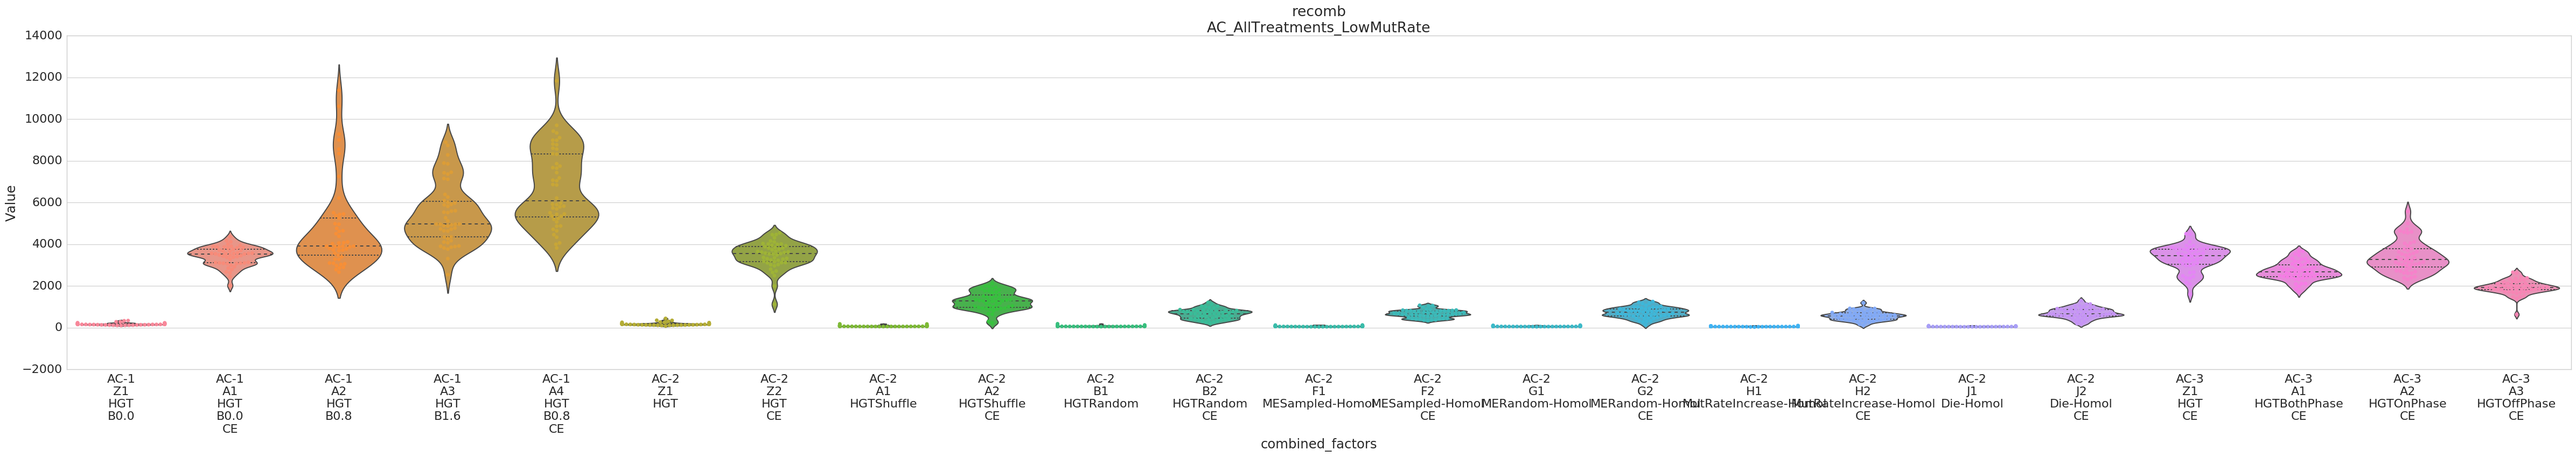

In [34]:
extract_stats(treatments, "hgt.dat.gz", "recomb", 8, verbose=False, dont_overwrite=True)
basic_violin(treatments, "recomb", width=60) 

## Fragment Effects

In [ ]:
phase_treatments = [treatments[t] for t in treatments if "AC-3" in t]
print phase_treatments
for phase_treatment in phase_treatments:
    df_t1 = read_fragment_effects(phase_treatment['dir'], 'A_cycle_hgt_fitnessdist-199001.dat') 
    print df_t1.describe()
    df_t1 = df_t1.sample(100)
    print df_t1.describe()
    plot_flamegraph(df_t1, maxy=200, update_binsize=5, title=phase_treatment['longlabel']+" ")
    plt.show()


In [126]:
plot_fragment_effects(grab_set(series="AC-3", ts=treatments), title="AC-3") 

TypeError: plot_fragment_effects() takes at least 2 arguments (2 given)

## Other Stuff

In [ ]:
extract_stats(treatments, "average.dat.gz", "execlength", 8, verbose=False)
basic_violin(treatments, "execlength", width=50)

In [ ]:
extract_stats(treatments, "average.dat.gz", "length", 7, verbose=False)
basic_violin(treatments, "length", width=50)

# Back-End

## Init

### Imports

In [161]:
import glob
import csv
import math
import collections
import os.path
from sets import Set
import sys


import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import scipy  
import scikits.bootstrap as bootstrap
#from scipy import stats
import scipy.stats as ss
import matplotlib.gridspec as gridspec
#from IPython.display import Image

from PIL import Image
from IPython.display import Image as ipyImage

import prettyplotlib as ppl
from matplotlib.colors import LogNorm
from prettyplotlib import brewer2mpl


#%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
%rehashx

#import mpld3
#mpld3.enable_notebook()

pd.__version__

u'0.19.1'

### Dataset Management Functions

In [162]:
data_path = ""
scripts_path = ""
analysis_directory = ""
data_name = ""

In [163]:
def add_treatment(dic, series, name, seed, longname=None, 
                  factors={}, skip_seeds=None,
                  location=None, filename=None):
    shortlabel = name
    if series:
        shortlabel = series + "_" + name
        
    if not longname:
        longname = name
                        
    if not location:        
        location = series + "_" + name + "_" + seed
    
    if skip_seeds == None:
        skip_seeds = []
    
    dic[shortlabel] = {'longlabel': longname, 'shortlabel': shortlabel, 'series': series,
                  'dir': location, 'filename': filename, 'factors': factors, 'skip': skip_seeds} 

In [164]:
def setup_analysis_path(treatments, base_path="/Core/home/rosiec/__research/HGT/raw_data/", 
                        scripts="~/Dropbox/School_Docs/Research/research_scripts/", verbose=False):
    ## basic config
    #base_path = "/Core/home/rosiec/__research/HGT/raw_data/FinalData/"
    #base_path = "/run/media/rosiec/Morlock/research/HGT/raw_data/FinalData/"

    global analysis_directory
    analysis_directory = "analysis"
    
    ## generated
    data_directory = "_".join(data_name.split(" "))
    global data_path
    data_path = base_path + data_directory
    analysis_path = data_path + "/" + analysis_directory
    global scripts_path
    scripts_path = scripts
    
#    global scripts_path
#    scripts_path = scripts_path

    if verbose:
        print "base_path:", base_path
        print "scripts_path:", scripts_path
        print "data_path:",data_path
        print "analysis_path", analysis_path
        print
        print "Treatments:"
        print treatments.keys()
        print
        print "Values:"
        for val in treatments.values():
            print val

In [165]:
def prepare_analysis_directories(treatments, skipchecks=False, cleanup=True, verbose=False):

    if verbose:
        print data_path
    !cd {data_path}
    %cd {data_path}
    if verbose:
        !pwd
        %pwd
    %mkdir incomplete
    if verbose:
        !pwd
    #!ls
    
    if not skipchecks:
        bleh = []
        for t in treatments:
            print treatments[t]['dir']
            datafiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
            for item in datafiles:

                filepath = item +"/data/count.dat"
                if os.path.isfile(filepath):
                    line = !tail -n 1 $filepath
                elif os.path.isfile(filepath+".gz"):
                    filepath = filepath+".gz"
                    line = !zcat $filepath | tail -n 1
                else:
                    if verbose:
                        print "count.dat[.gz] not found."
                    line = ""

                filepath = item +"/data/average.dat"
                if not os.path.isfile(filepath) and not os.path.isfile(filepath+".gz"):
                    if verbose:
                        print "average.dat[.gz] not found."
                    line = ""



                #print filepath
                #bleh = line
                #print line
                #line = line.split(' ')[0]
                #print line
                if len(line) == 0 or line[0].split(' ')[0] != '200000':
                    if verbose:
                        print "Incomplete", item, line
                    if cleanup:
                        !mv $item incomplete/

    %mkdir {analysis_directory}
    %cd {analysis_directory}
    if verbose:
        %pwd

    for t in treatments:
        print
        print t, ": " , len(glob.glob(data_path+'/'+treatments[t]['dir']+'*'))
        for v in treatments[t]:
            print "  ",v,": ", treatments[t][v]
            


In [166]:
def test_data_accessibility(treatments):
    !pwd
    direct = treatments[treatments.keys()[0]]['dir']
    print "regular cat"
    %cat ../{direct}001/data/log_average.dat | head -n 20
    print
    print "zcat"
    %zcat ../{direct}001/data/log_average.dat* | head -n 20
    
#test_data_accessibility()

In [167]:
def test_scripts_accessibilty(treatments):
    import sys
    sys.path.append({scripts_path})
    %run {scripts_path}/quickplot.py --help

## Plotting Functions

### Helper Functions

#### Dataset Manipulation (Grab/Thin)

In [168]:
def grab_set(ts, factor=None, series=None):
    if not factor and not series:
        return ts
    if series and factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               (factor in ts[t]['factors'].values() and 
               ts[t]['series'] == series)]
        
        #print "HI", series, factor
        #print thing
        
    elif factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               factor in ts[t]['factors'].values()]
    elif series:
        thing = [ts[t]['shortlabel'] for t in ts if 
               ts[t]['series'] == series]
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_grab_set(treatments):

    print "Subsetting"
    print treatments.keys()
    print
    print "Subset, selecting on series AC-1"
    print grab_set(series="AC-1", ts=treatments).keys()

In [169]:
## THIN SETS
def thin_set(ts, factor=None, series=None):

    thing = ts.keys()
    
    if factor:
        for t in ts.keys():
            if factor in ts[t]['factors'].values():
                thing.remove(t)
                
    if series:
        for t in ts.keys():
            if series == ts[t]['series']:
                thing.remove(t)
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_thin_set(treatments):
    print
    print "Thinning Set"
    print treatments.keys()
    thingy = grab_set(series="AC-2", factor="Homol", ts=treatments)
    print
    print "Subset selecting by HOMOL factor"
    print thingy.keys()
    print
    print "Thinned by removing MRI factor"
    print thin_set(factor="MRI", ts=thingy).keys()

In [170]:
def factorset(treatments):
    factorset = None
    for t in ac2_set:
        if not factorset:
            factorset = set(treatments[t]['factors'].keys())
        factorset &= set(treatments[t]['factors'].keys())
    return list(factorset)

In [171]:
def matchingcolumns(dataset1, dataset2):
    return list( set(dataset1.columns) & set(dataset2.columns) )
    

#### Data Extraction

##### Extract Stats - With Python Script and dump into summary csv file. (relatively slow)

In [172]:
## generate sums datafiles

def extract_stats(treatments, datafile, fieldname, field_num, verbose=True, calc="mean", dont_overwrite=False):
    ## calc can be "calculate_stats", "mean", "median", "ste", "std", "var", "sum"   

    outfiles = ""
    print "Extract Stats:", datafile, "field:", fieldname, "(", field_num, ") - ", calc
    sys.stdout.write("Extracting: ")
    for t in treatments:
        datafiles = ""
        outfile = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"

        dfiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
        for item in dfiles:
            filepath = item +"/data/"+datafile
            datafiles += filepath + " "

        script  = scripts_path + 'common/extract_single_column_to_csv.py --'+calc+' -s " " ' + str(field_num) + ' '
        script += datafiles
        script += ' >> ' + outfile

        if verbose:
            print script
            print
        
        existed = False
        if os.path.isfile(outfile): # there's a file            
            if not dont_overwrite: # we can overwrite it.            
                !rm $outfile
                !python2 $script
            existed = True
        else: ## no file, always write it
            !python2 $script            
            
        
        
        if (existed):
            if dont_overwrite:
                sys.stdout.write(',')
            else:
                sys.stdout.write('o')
        else:
            sys.stdout.write('+')
            
        sys.stdout.flush()


        if verbose:
            print outfile
        outfiles += outfile + " "        
        
        
        
        
    print " Done"

In [32]:
def test_extract_stats(treatments):

    #incoming_postfix = '_active_site_count.csv'
    fieldname = "fitness"
    extract_stats(treatments, "average.dat.gz", fieldname, "4", verbose=False, dont_overwrite=True)  
    %ls *_fitness.csv
    fn = treatments[treatments.keys()[0]]['shortlabel'] + "_" + fieldname + ".csv"
    %head {fn}
test_extract_stats(treatments)

Extract Stats: average.dat.gz field: fitness ( 4 ) -  mean
Extracting: ,,,,,,,,,,,,,,,,,,,,,,, Done
AC-1_A1_HGT_B0.0_CE_fitness.csv
AC-1_A2_HGT_B0.8_fitness.csv
AC-1_A3_HGT_B1.6_fitness.csv
AC-1_A4_HGT_B0.8_CE_fitness.csv
AC-1_Z1_HGT_B0.0_fitness.csv
AC-2_A1_HGTShuffle_fitness.csv
AC-2_A2_HGTShuffle_CE_fitness.csv
AC-2_B1_HGTRandom_fitness.csv
AC-2_B2_HGTRandom_CE_fitness.csv
AC-2_F1_MESampled-Homol_fitness.csv
AC-2_F2_MESampled-Homol_CE_fitness.csv
AC-2_G1_MERandom-Homol_fitness.csv
AC-2_G2_MERandom-Homol_CE_fitness.csv
AC-2_H1_MutRateIncrease-Homol_fitness.csv
AC-2_H2_MutRateIncrease-Homol_CE_fitness.csv
AC-2_J1_Die-Homol_fitness.csv
AC-2_J2_Die-Homol_CE_fitness.csv
AC-2_Z1_HGT_fitness.csv
AC-2_Z2_HGT_CE_fitness.csv
AC-3_A1_HGTBothPhase_CE_fitness.csv
AC-3_A2_HGTOnPhase_CE_fitness.csv
AC-3_A3_HGTOffPhase_CE_fitness.csv
AC-3_Z1_HGT_CE_fitness.csv
2944.31156612
25124.8504047
1051135.4052
26269.1296876
291223.189495
445398.318866
66937.6249194
24297.2039225
5068.03086814
12963.9717171


##### Import Data summary files into a dataframe

In [173]:
def import_data(treatments, fieldnames, location="", subset=[]):    

    if not isinstance(fieldnames, list):
        fieldnames = [fieldnames]
    
    if location:
        for t in treatments:
            f = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"
            df = location + f ## if they're somewhere else, for whatever reason
            print "moving from", df, "to", f
            !cp $df ./$f

    dfs = []
    for t in treatments:      
        ## pull in the data    
        
        if len(subset) > 0:
            if not treatments[t]['shortlabel'] in subset:
                continue
                
        for fieldname in fieldnames:                
            f = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"
            dta = pd.read_csv(f, header=None, skipinitialspace=True, names=["Value"])

            #print dta.dropna().head()
            dta = dta.dropna()

            dta['Label'] = [treatments[t]['shortlabel']] * len(dta)
            
            for f in treatments[t]['factors'].keys():
                dta[f] = [treatments[t]['factors'][f]] * len(dta)
                
            #dta['Experiment'] = [treatments[t]['exp']] * len(dta)
            #dta['SubExp'] = [treatments[t]['subex']] * len(dta)
            #dta['Treatment'] = [treatments[t]['treatment']] * len(dta)
            dta['Fieldname'] = [fieldname] * len(dta)

    #         wholex = treatments[t]['exp']
    #         if treatments[t]['subex']:
    #             wholex += "\n" + treatments[t]['subex']
    #         dta['Whole_Experiment'] = [wholex] * len(dta)
            dfs.append(dta)

    bigframe = pd.concat(dfs, axis=0)
    bigframe.head()
    return bigframe #.dropna()

In [ ]:
def test_import_data(treatments):

    df = import_data(treatments, "fitness")
    print df.describe()
    #print df.columns
    print df.head()
    #print df.tail()
test_import_data(treatments)

##### Read raw files, and import directly to dataframe

In [174]:
#print treatments.keys()
def read_data(dirname, filename, fieldname, col):
    
    dfs = []
    
    dfiles = glob.glob(data_path+'/'+dirname+'*')
    print "begun reading files."    
    for item in sorted(dfiles):
        filepath = item +"/data/"+filename
        if len(glob.glob(filepath+"*")) > 0:
            filepath = glob.glob(filepath+"*")[0]
        else:
            raise("File Not Found.")
        
        #print filepath

        df = pd.read_csv(filepath, sep=" ", header=None, usecols=[col],
                #index_col=1, 
                names=[fieldname],
                comment="#",
                skip_blank_lines=True,
                )  
        
        df = df.dropna()
        
        df['replicate'] = [item[-2:]] * len(df[fieldname])
                
        dfs.append(df)
        
    print "finished reading files."    
    bigframe = pd.concat(dfs, axis=0)
    
    bigframe = bigframe.sort_index()
    return bigframe #.dropna() 

In [175]:
def collect_data(ts,filename, fieldname, col):
    
    dfs = []
    for t in ts:
        try:
            print t

            dta = read_data(ts[t]['dir'], filename, fieldname, col)  

            dta = dta.replace([np.inf, -np.inf], np.nan)
            dta = dta.dropna()

            #dta['source'] = [t] * len(dta['effect'])
            
            dta['Label'] = [ts[t]['shortlabel']] * len(dta)
            #dta['DisplayLabel'] = ["\n".join(ts[t]['shortlabel'].split("_"))] * len(dta)
            #dta['Fieldname'] = [fieldname] * len(dta)
            
            for f in ts[t]['factors'].keys():
                dta[f] = [ts[t]['factors'][f]] * len(dta)

            dfs.append(dta)
        except:
            continue
            
    bigframe = pd.concat(dfs, axis=0)
    return bigframe

In [176]:
def aggregate_data(ts, dataframe, fieldname="Value", aggregation="mean"):
    factorset = None
    for t in ts:
        if not factorset:
            factorset = set(ts[t]['factors'].keys())
        factorset &= set(ts[t]['factors'].keys())
    #print factorset
    
    #othercols = list(set(dataframe.columns) - set([fieldname]))
    
    grouped = dataframe.groupby((['Label', 'replicate'] + list(factorset)))
    if aggregation == "mean":
        dataframe_aggregated = grouped[fieldname].mean().reset_index()
    elif aggregation == "sum":
        dataframe_aggregated = grouped[fieldname].sum().reset_index()   
        
    return dataframe_aggregated
    
    
    

In [177]:
def generate_display_label(dataframe, labelfield="Label"):
        #df = pd.DataFrame(dataframe)
        return dataframe.apply(lambda row: "\n".join(row[labelfield].split("_")), axis=1)
        #return df

begun reading files.
finished reading files.
   uptake replicate
0       0        01
0       0        48
0       0        39
0       0        14
0       0        27
              uptake
count   98049.000000
mean    81800.965976
std     48888.770988
min         0.000000
25%     42432.000000
50%     84058.000000
75%    118750.000000
max    425157.000000
   uptake replicate
0       0        01
0       0        48
0       0        39
0       0        14
0       0        27
      uptake replicate
2000  107632        40
2000  107743        11
2000  136848        08
2000  113950        46
2000  114851        50
              uptake
count   98049.000000
mean    81800.965976
std     48888.770988
min         0.000000
25%     42432.000000
50%     84058.000000
75%    118750.000000
max    425157.000000


AC-1_Z1_HGT_B0.0
begun reading files.
finished reading files.
AC-1_A1_HGT_B0.0_CE
begun reading files.
finished reading files.
AC-1_A2_HGT_B0.8
begun reading files.
finished reading files.
AC-1_A3_

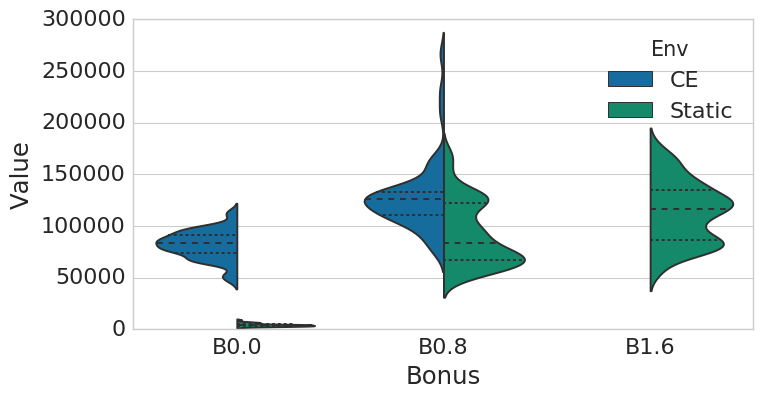

In [143]:
def test_read_data(treatments):
    #sorted_bdf = bdf.sort_index()

    bdf = read_data(treatments[treatments.keys()[1]]['dir'], 'hgt.dat.gz','uptake', 6)    
    print bdf.head()
    print bdf.describe()
    bdf = bdf.replace([np.inf, -np.inf], np.nan)
    bdf = bdf.dropna()
    print bdf.head()
    print bdf.tail()
    print bdf.describe()

def test_collect_data(treatments):
    bigframe = collect_data(grab_set(series="AC-1", ts=treatments), 'hgt.dat.gz','uptake', 6) 
    print bigframe.head()
    print bigframe.describe()
    print
    
    grouped = bigframe.groupby(['Label','replicate','Bonus','Env'])
    print grouped.head()
    effect_means = grouped['Value'].mean().reset_index()
    print effect_means.head()
    
    #effect_means.bar(x="uptake")
    sns.violinplot(x="Bonus", y="Value", hue="Env",data=effect_means, 
                       split=True, 
                       scale="count", scale_hue=False, bw=.3, inner="quart", 
#                       palette=pal_v
                  )
test_read_data(treatments) 
print
print
test_collect_data(treatments)



##### Read Fragment Effects

In [178]:
#print treatments.keys()
def read_fragment_effects(dirname, filename):
    
    dfs = []
    
    dfiles = glob.glob(data_path+'/'+dirname+'*')
    print "begun reading files."    
    for item in sorted(dfiles):
        filepath = item +"/data/"+filename
        if len(glob.glob(filepath+"*")) > 0:
            filepath = glob.glob(filepath+"*")[0]
        else:
            raise("File Not Found.")
        
        
        
        
        #print filepath

        df = pd.read_csv(filepath, sep=" ", header=None, usecols=[0,1,2,5,6],
                index_col=1, 
                names=["cell", "donor_update","effect", "hamming_dist", "fraction"],
                comment="#",
                skip_blank_lines=True,
                )  
        
        df = df.dropna()
        
        df['replicate'] = [item[-2:]] * len(df['cell'])
                
        dfs.append(df)
        
    print "finished reading files."    
    bigframe = pd.concat(dfs, axis=0)
    
    bigframe = bigframe.sort_index()
    return bigframe #.dropna() 

In [179]:
def collect_fragment_effects_data(ts,filename='A_cycle_hgt_fitnessdist-199001.dat',):
    
    dfs = []
    for t in ts:
        try:
            print t

            dta = read_fragment_effects(ts[t]['dir'], filename)  

            dta = dta.replace([np.inf, -np.inf], np.nan)
            dta = dta.dropna()

            #dta['source'] = [t] * len(dta['effect'])
            
            dta['Label'] = [ts[t]['shortlabel']] * len(dta)
            #dta['DisplayLabel'] = ["\n".join(ts[t]['shortlabel'].split("_"))] * len(dta)
            
            for f in ts[t]['factors'].keys():
                dta[f] = [ts[t]['factors'][f]] * len(dta)

            dfs.append(dta)
        except:
            continue
            
    bigframe = pd.concat(dfs, axis=0)
    return bigframe

In [26]:
def test_read_fragment_effects(treatments):
    #sorted_bdf = bdf.sort_index()

    bdf = read_fragment_effects(treatments[treatments.keys()[1]]['dir'], 'A_cycle_hgt_fitnessdist-199001.dat')    
    print bdf.head()
    print bdf.describe()
    bdf = bdf.replace([np.inf, -np.inf], np.nan)
    bdf = bdf.dropna()
    print bdf.head()
    print bdf.tail()
    print bdf.describe()
    
test_read_fragment_effects(treatments)    

begun reading files.
finished reading files.
              cell  effect  hamming_dist  fraction replicate
donor_update                                                
186903        3033     0.0             0       inf        15
187938        1744     0.0             3       inf        15
187956        2657     0.0             3       inf        15
188268        2129     0.0             3       inf        15
188364        3142     0.0             3       inf        15
               cell        effect  hamming_dist      fraction
count  1.270815e+07  1.270815e+07  1.270815e+07  1.270815e+07
mean   1.728137e+03  1.012883e+00  1.346620e+01           inf
std    1.043528e+03  1.225384e+01  2.477878e+01           NaN
min    0.000000e+00 -2.359650e+02  0.000000e+00 -1.000000e+00
25%    8.170000e+02  0.000000e+00  0.000000e+00           inf
50%    1.713000e+03  0.000000e+00  2.000000e+00           NaN
75%    2.631000e+03  0.000000e+00  1.600000e+01           inf
max    3.599000e+03  5.649660e+0

In [253]:
def test_collect_fragment_effects(treatments):
     #ac2_df = collect_fragment_effects_data(grab_set(series="AC-2", ts=treatments))
    bdf = collect_fragment_effects_data(grab_set(series="AC-3", ts=treatments))
    print bdf.head()
    print bdf.describe()
test_collect_fragment_effects(treatments)

AC-3_Z1_HGT_CE
begun reading files.
finished reading files.
AC-3_A1_HGTBothPhase_CE
begun reading files.
finished reading files.
AC-3_A2_HGTOnPhase_CE
begun reading files.
finished reading files.
AC-3_A3_HGTOffPhase_CE
begun reading files.
finished reading files.
              cell    effect  hamming_dist  fraction replicate  \
donor_update                                                     
188781        1629 -0.001759            32 -0.006802        29   
189324        2047 -0.047044            59 -0.002844        29   
189562        1486  0.000000             1  0.000000        14   
189663        2060 -0.816000             2 -1.000000        30   
189888        2060  0.000000             0  0.000000        30   

                       Label    Phase Env  
donor_update                               
188781        AC-3_Z1_HGT_CE  NoPhase  CE  
189324        AC-3_Z1_HGT_CE  NoPhase  CE  
189562        AC-3_Z1_HGT_CE  NoPhase  CE  
189663        AC-3_Z1_HGT_CE  NoPhase  CE  
189888   

##### Read Fragment Phenotype Change

In [180]:
def read_fragment_phenotype_change(dirname, filename, incl_neutral=False, negative=False):
    
    dfiles = glob.glob(data_path+'/'+dirname+'*')
    print "begun reading files."

    totals = []
    bens = []
    fracs = []
    repl = []

    for item in sorted(dfiles):
        filepath = item +"/data/"+filename
        if len(glob.glob(filepath+"*")) > 0:
            filepath = glob.glob(filepath+"*")[0]
        else:
            raise("File Not Found.")
          
        df = pd.read_csv(filepath, sep=" ", header=None, usecols=[1,2,3,4,6],
                        index_col=0, 
                        names=["donor_update","effect", "original_task", "mod_task", "fraction"],
                        comment="#",
                        skip_blank_lines=True,
                         #skiprows=8
                        converters={'original_task': lambda x: int(x,2)>>1, 'mod_task': lambda x: int(x,2)>>1})
        #print df.describe()
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.dropna()
        #print df.describe()
        
        if negative:
            if (incl_neutral):
                df_subset2 = df.loc[df['effect'] <= 0.0]
                #df_subset2 = df_subset.loc[df_subset['original_task'] != df_subset['mod_task']]
            else:
                df_subset = df.loc[df['effect'] < 0.0]
                df_subset2 = df_subset.loc[df_subset['original_task'] != df_subset['mod_task']]           
        else:
            if (incl_neutral):
                df_subset2 = df.loc[df['effect'] >= 0.0]
                #df_subset2 = df_subset.loc[df_subset['original_task'] != df_subset['mod_task']]
            else:
                df_subset = df.loc[df['effect'] > 0.0]
                df_subset2 = df_subset.loc[df_subset['original_task'] != df_subset['mod_task']]
             
        repl.append(item[-2:])    
        totals.append(df['effect'].count())
        bens.append(df_subset2['effect'].count())
        fracs.append(bens[-1]/float(totals[-1]))
        
    print "finished reading files."    
 
    newdf = pd.DataFrame()
    newdf['total_frags'] = totals
    newdf['ben_frags'] = bens
    newdf['frac_ben'] = fracs
    newdf['replicate'] = repl

    return newdf

In [185]:
def test_read_fragment_phenotype_change(treatments):
    #sorted_bdf = bdf.sort_index()

    bdf = read_fragment_phenotype_change(treatments[treatments.keys()[1]]['dir'], 'A_cycle_hgt_fitnessdist-100001.dat')    
    print bdf.head()
    print bdf.describe()
test_read_fragment_phenotype_change(treatments)

begun reading files.
finished reading files.
   total_frags  ben_frags  frac_ben  replicate
0         7322        739  0.100929          1
1         4710        100  0.021231          3
2         6213         44  0.007082          4
3        13448        168  0.012493          5
4        13490        436  0.032320          6
        total_frags    ben_frags   frac_ben  replicate
count     49.000000    49.000000  49.000000  49.000000
mean    7089.591837   321.673469   0.042899  25.979592
std     5139.373579   323.196560   0.023540  14.324353
min      697.000000     9.000000   0.007082   1.000000
25%     4123.000000   148.000000   0.026018  14.000000
50%     5649.000000   204.000000   0.034245  26.000000
75%     8054.000000   430.000000   0.054824  38.000000
max    23296.000000  1461.000000   0.100929  50.000000


In [181]:
def collect_fragment_phenotype_change(ts, filename='A_cycle_hgt_fitnessdist-199001.dat', 
                                   incl_neutral=False, negative=False):
    dfs = []
    for t in ts:
        print t
        try:
            dta = read_fragment_phenotype_change(ts[t]['dir'], filename, 
                                                 incl_neutral=incl_neutral, negative=negative)  
            
            #dfa['source'] = [t] * len(dta['total_frags'])
            
            dta = dta.replace([np.inf, -np.inf], np.nan)
            dta = dta.dropna()

            #dta['source'] = [t] * len(dta['effect'])
            
            dta['Label'] = [ts[t]['shortlabel']] * len(dta)
            #dta['DisplayLabel'] = ["\n".join(ts[t]['shortlabel'].split("_"))] * len(dta)
            
            for f in ts[t]['factors'].keys():
                dta[f] = [ts[t]['factors'][f]] * len(dta)
            
            dfs.append(dta)
        except:
            continue
            
        

    bigframe = pd.concat(dfs, axis=0)   
    
    #bigframe['treatment'] = bigframe['source'].apply(lambda row: "\n".join(row.split("_")))
    return bigframe

In [194]:
def test_collect_fragment_phenotype_change(treatments):
    #sorted_bdf = bdf.sort_index()

    bdf = collect_fragment_phenotype_change(grab_set(series="AC-3", ts=treatments), 'A_cycle_hgt_fitnessdist-100001.dat')    
    print bdf.head()
    print bdf.describe()
test_collect_fragment_phenotype_change(treatments)

AC-3_Z1_HGT_CE
begun reading files.
finished reading files.
AC-3_A1_HGTBothPhase_CE
begun reading files.
finished reading files.
AC-3_A2_HGTOnPhase_CE
begun reading files.
finished reading files.
AC-3_A3_HGTOffPhase_CE
begun reading files.
finished reading files.
   total_frags  ben_frags  frac_ben  replicate           Label  \
0        13917        193  0.013868          1  AC-3_Z1_HGT_CE   
1         5535        126  0.022764          2  AC-3_Z1_HGT_CE   
2         5672        335  0.059062          3  AC-3_Z1_HGT_CE   
3        19140        403  0.021055          4  AC-3_Z1_HGT_CE   
4         3000         91  0.030333          5  AC-3_Z1_HGT_CE   

        DisplayLabel    Phase Env  
0  AC-3\nZ1\nHGT\nCE  NoPhase  CE  
1  AC-3\nZ1\nHGT\nCE  NoPhase  CE  
2  AC-3\nZ1\nHGT\nCE  NoPhase  CE  
3  AC-3\nZ1\nHGT\nCE  NoPhase  CE  
4  AC-3\nZ1\nHGT\nCE  NoPhase  CE  
         total_frags    ben_frags    frac_ben   replicate
count     191.000000   191.000000  191.000000  191.000000
mean   

### Plotting

#### Plot Violin

In [182]:
def basic_violin(ts, fieldnames, subset=[], hue=None, title="", width=16, height=8, debug=False, font_scale=2):
    
    if not isinstance(fieldnames, list):
        fieldnames = [fieldnames]
        
    fieldname = " ".join(fieldnames)    
        
    df = import_data(ts, fieldnames, subset=subset)
    
    if debug:
        print df.head()
    
#    print "HIHI"
    df['combined_factors'] = [''] * len(df)
    huebit = []
    if hue:
        factors = Set([])
        for t in ts:
            factors = factors | Set(ts[t]['factors'])
#        factors = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4']

        for f in [f for f in factors if f not in hue]: 
            if f in df.columns:
                df['combined_factors'] = df['combined_factors'] + "\n" + df[f]
                
        huebit = df[hue].dropna().unique().tolist()  
#        if huebit[0] == 'nan':
#            huebit = huebit[1:]
    elif len(fieldnames) > 1:
        huebit = df['Fieldname'].dropna().unique().tolist()
        df['combined_factors'] = df['Label'].apply(lambda row: "\n".join(row.split("_")))
    else:
        df['combined_factors'] = df['Label'].apply(lambda row: "\n".join(row.split("_")))
        
    pal_v = {}
    pal_s = {}
    
#    print 
#    print "HUEs", huebit

    if len(huebit) > 0:
        v_colors = ['r','b']
        s_colors = ['y', 'g']
            
        for v, i in zip(huebit , range(len(huebit))):
            pal_v[v] = v_colors[i]
            pal_s[v] = s_colors[i]
#    print pal_v
#    print pal_s
    
#    print "ARGH"
    #print df
    
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=font_scale)
    
    plt.rcParams['figure.figsize'] = (width, height)
    
    if title:
        sns.plt.title(fieldname +"\n"+data_name+"\n"+title)    
    else:
        sns.plt.title(fieldname +"\n"+data_name)
        
        
#    print "WHEE"
    
    if len(fieldnames) == 2:            
        sns.violinplot(x="combined_factors", y="Value", hue="Fieldname",data=df, 
                       split=True, 
                       scale="count", scale_hue=False, bw=.3, inner="quart", 
                       palette=pal_v)
        sns.swarmplot(x="combined_factors", y="Value", hue="Fieldname", data=df, 
                     split=True,
                     palette=pal_s)
    elif len(fieldnames) > 2:
        sns.violinplot(x="combined_factors", y="Value", hue="Fieldname", data=df, 
                       scale="count", scale_hue=False, bw=.3, inner="quart")
        sns.swarmplot(x="combined_factors", y="Value", hue="Fieldname", data=df, 
                     split=True)
    elif hue:
        sns.violinplot(x="combined_factors", y="Value", hue=hue, data=df, 
                       split=True, 
                       scale="count", scale_hue=False, bw=.3, inner="quart", 
                       palette=pal_v)
        sns.swarmplot(x="combined_factors", y="Value", hue=hue, data=df, 
                     split=True,
                     palette=pal_s)        
    else:
        sns.violinplot(x="combined_factors", y="Value", data=df, 
                       scale="count", scale_hue=False, bw=.3, inner="quart")
        sns.swarmplot(x="combined_factors", y="Value", data=df, 
                     split=True)        
    plt.show()
    

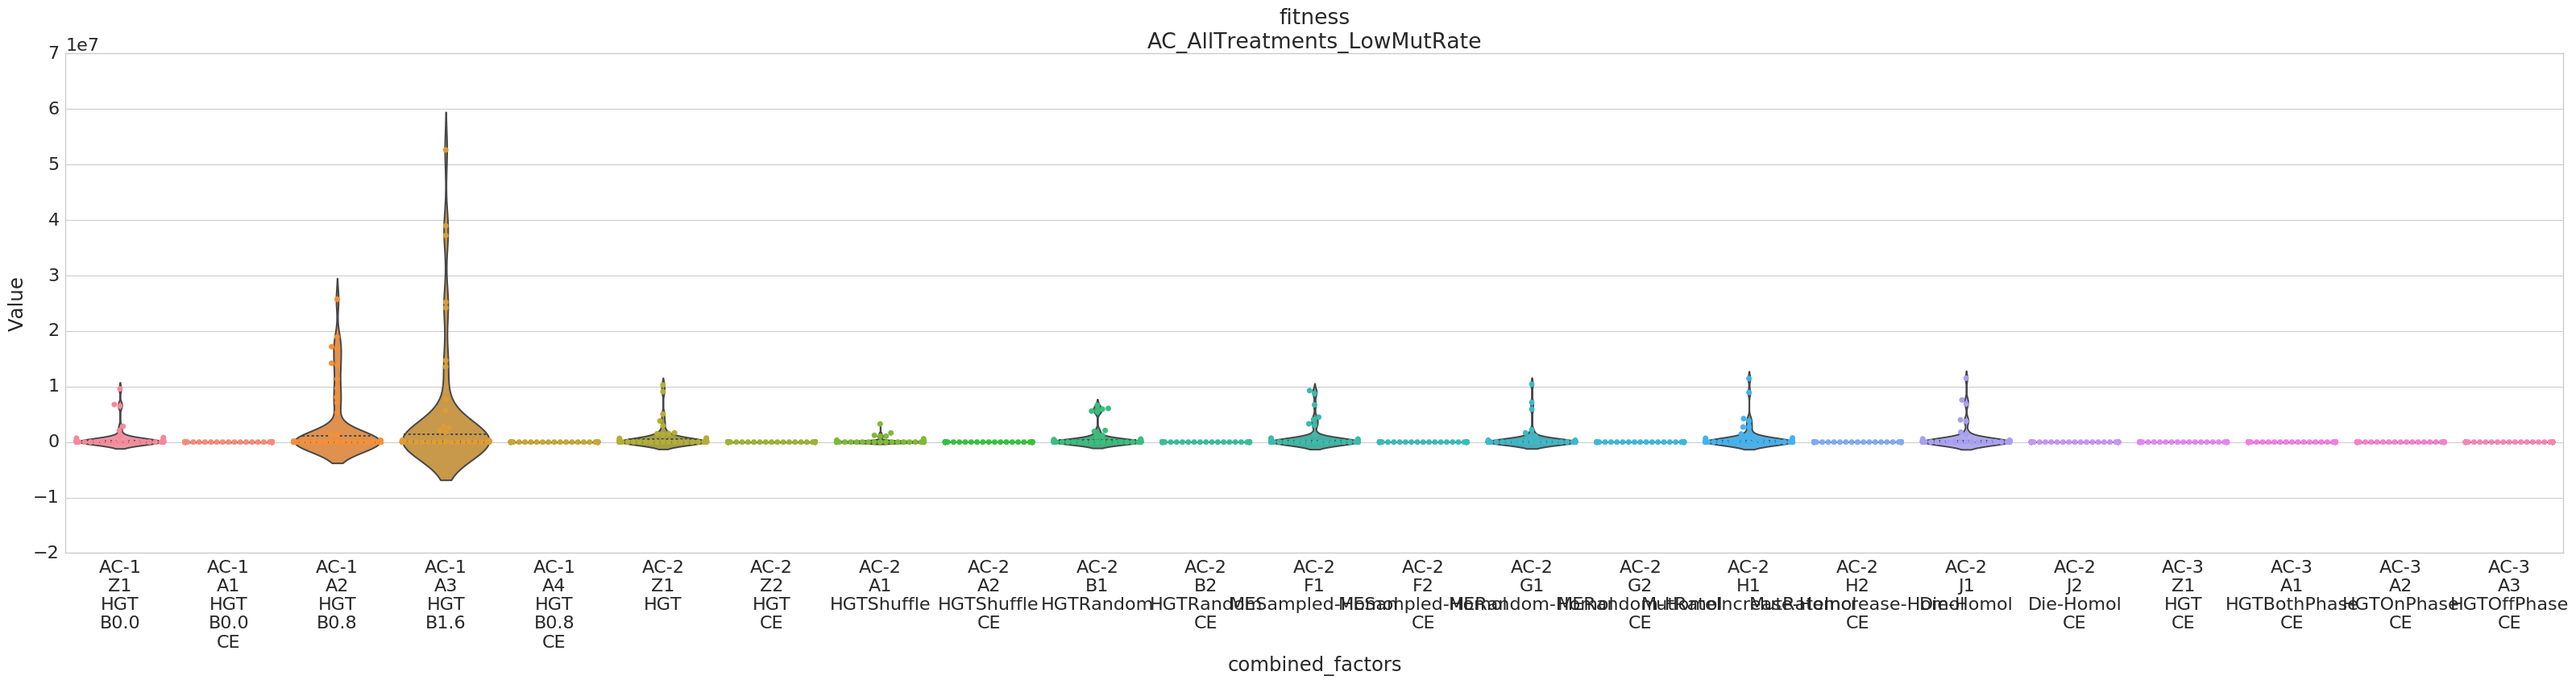

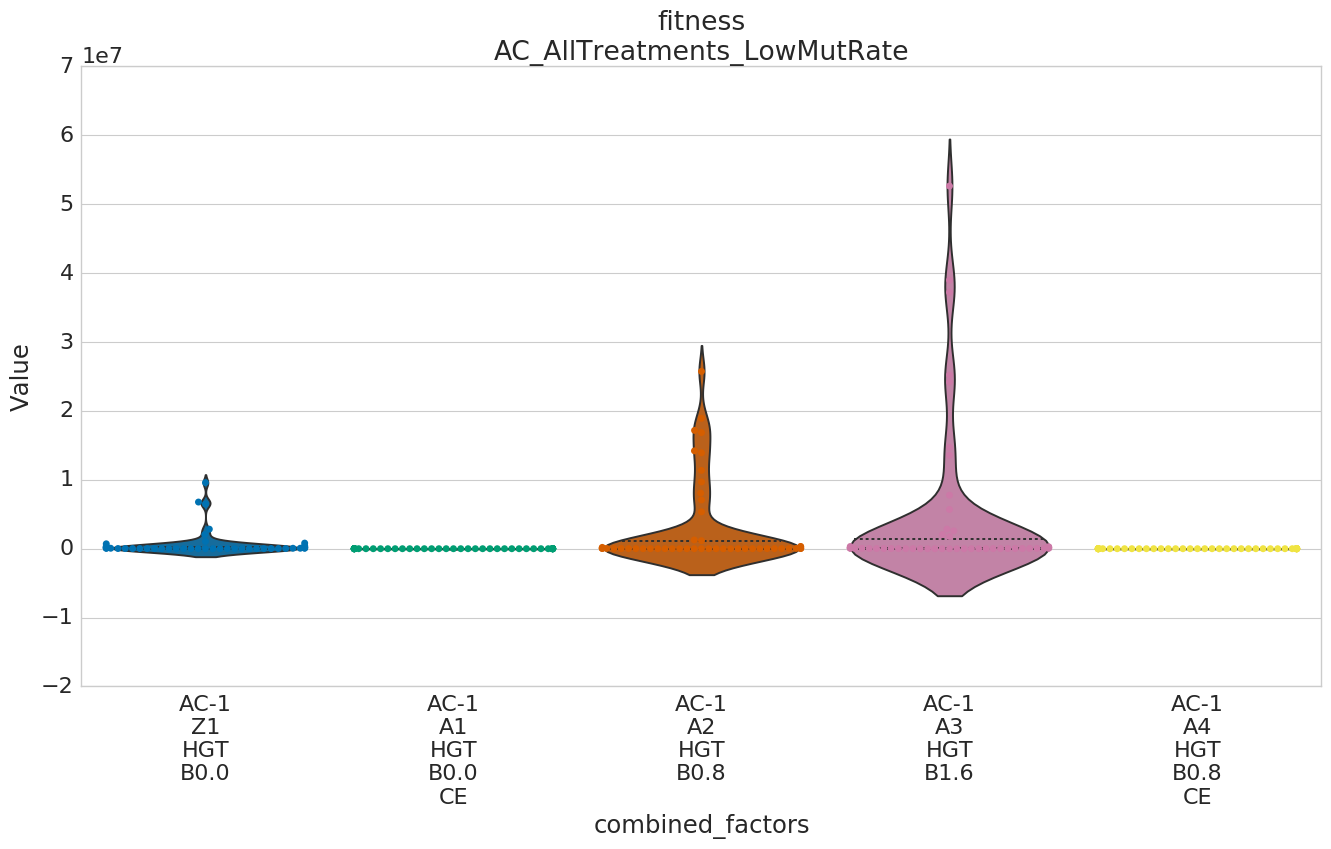

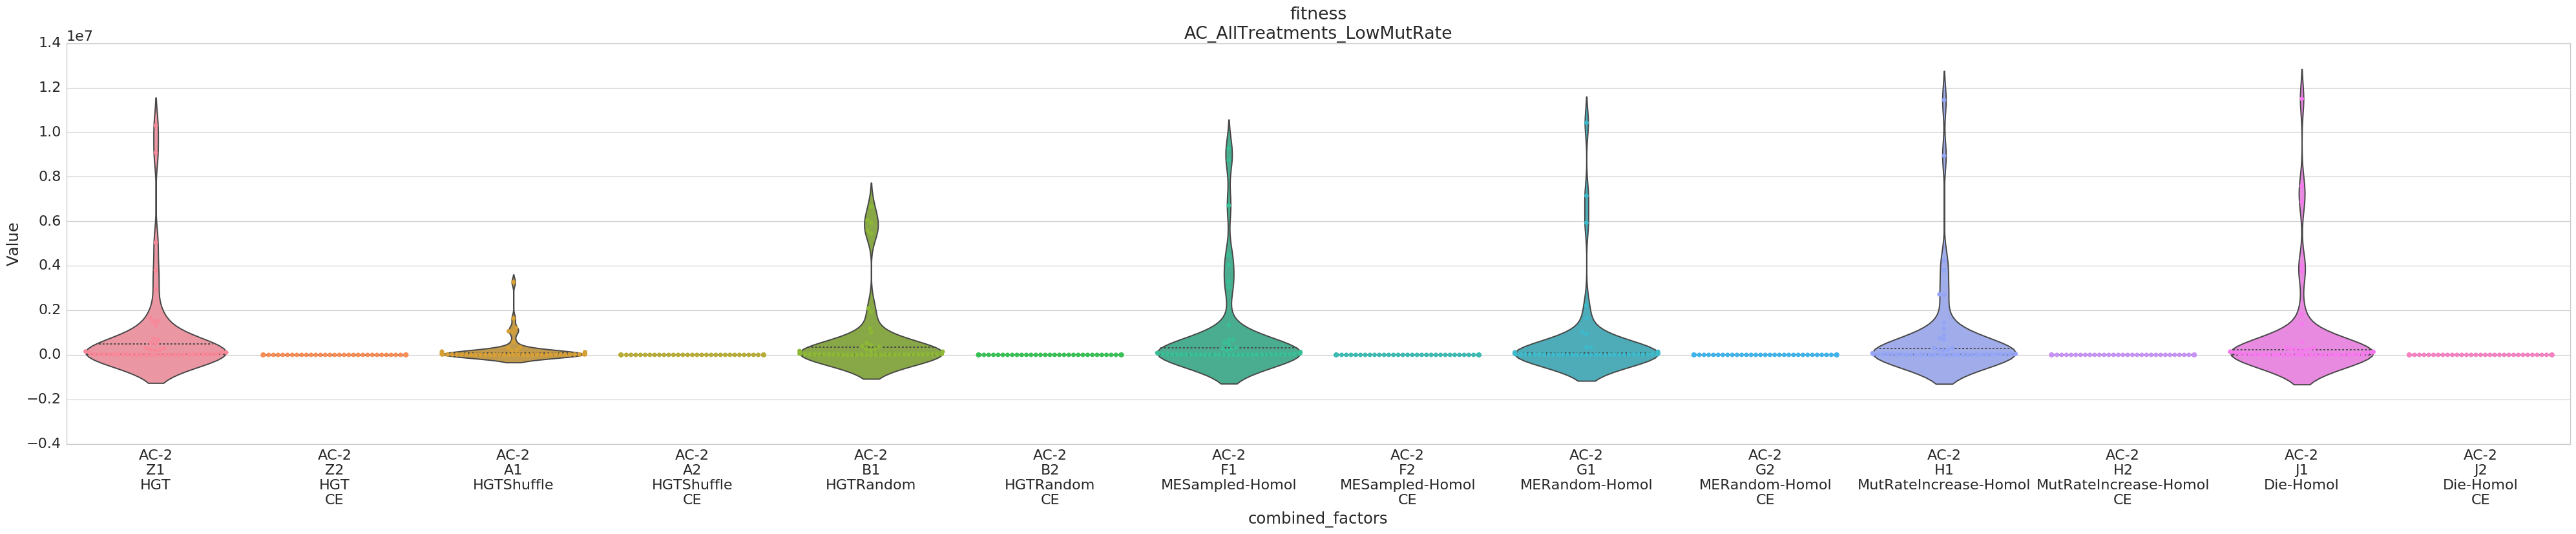

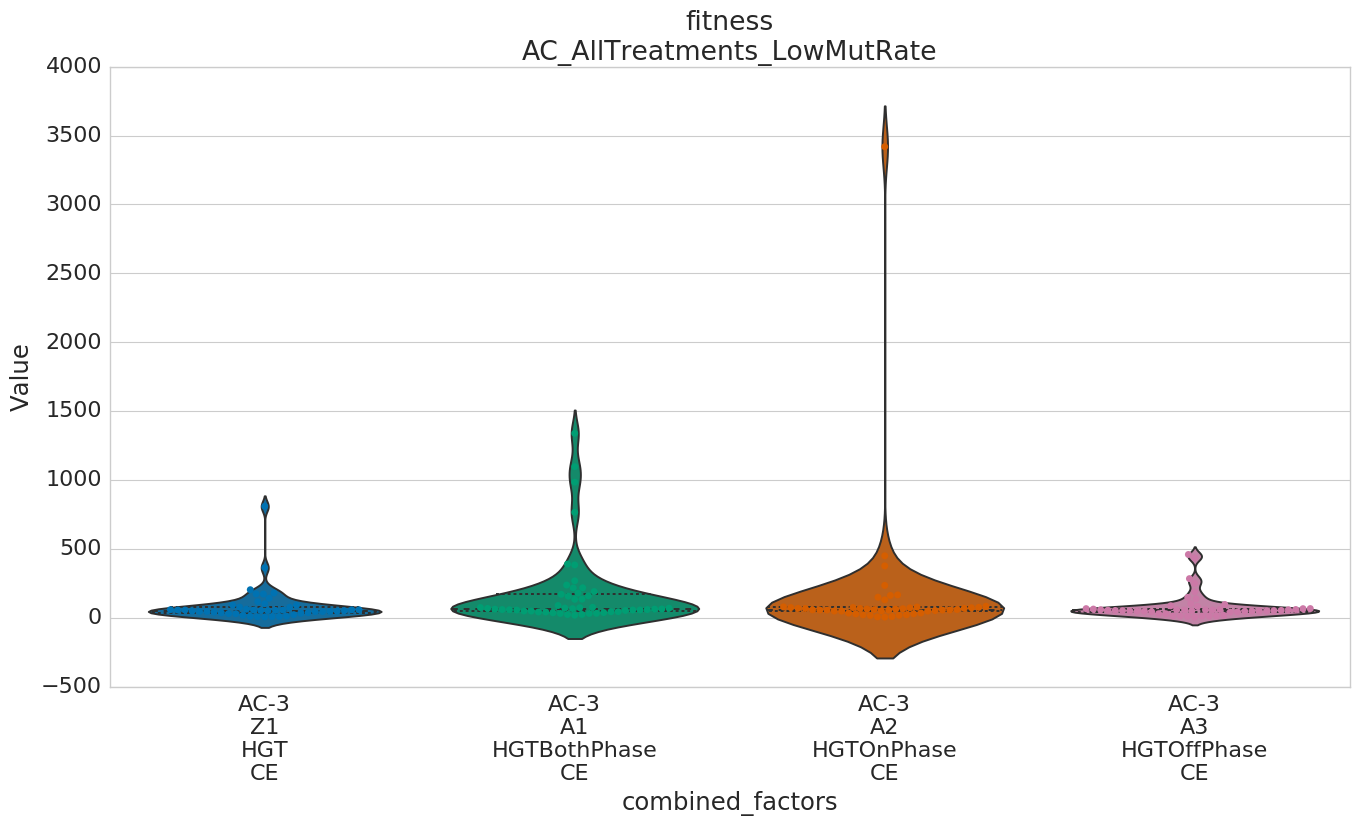

Extract Stats: hgt.dat.gz field: uptake ( 7 ) -  mean
Extracting: ooooooooooooooooooo++++ Done
Extract Stats: hgt.dat.gz field: attempts ( 10 ) -  mean
Extracting: ooooooooooooooooooo++++ Done


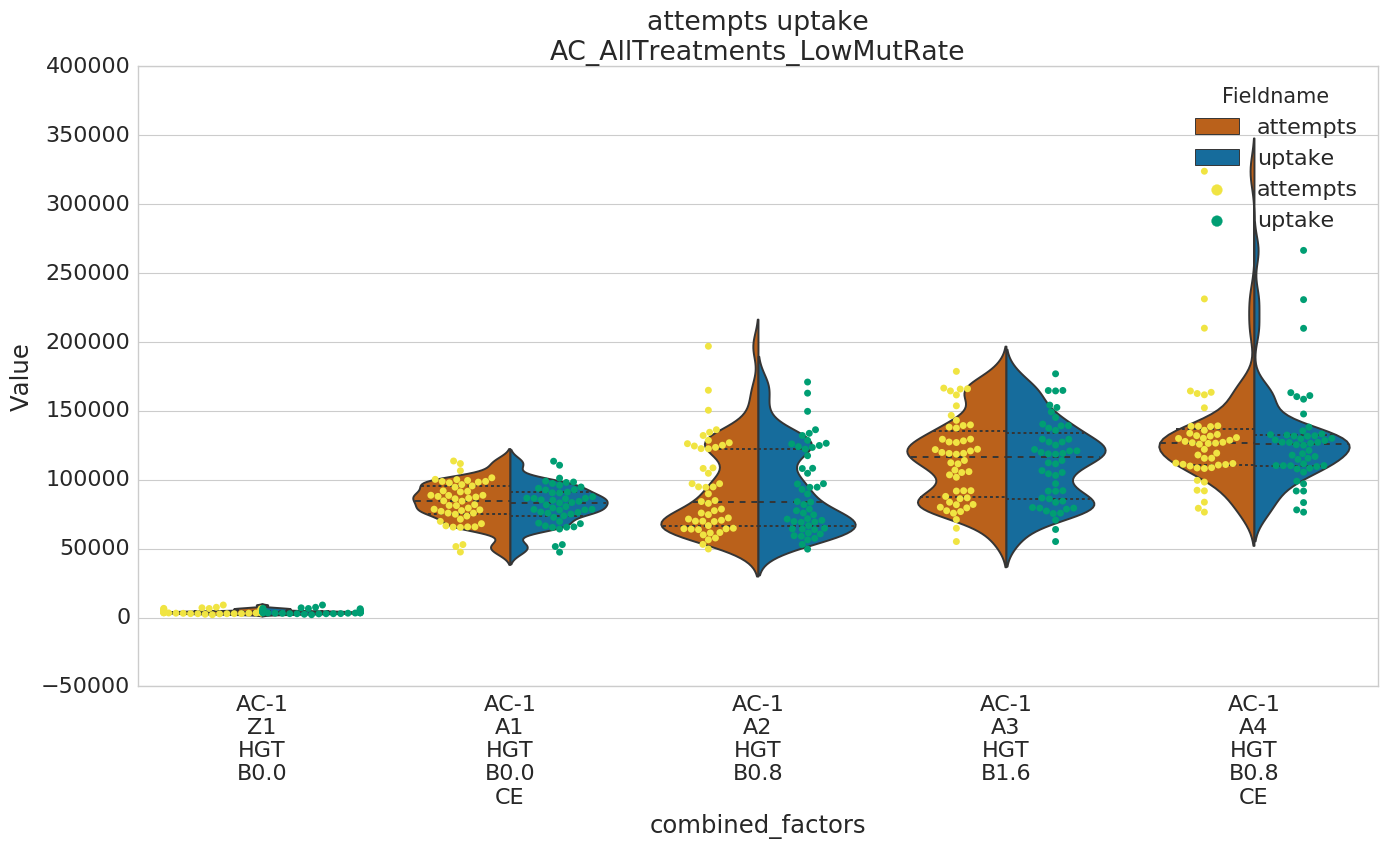

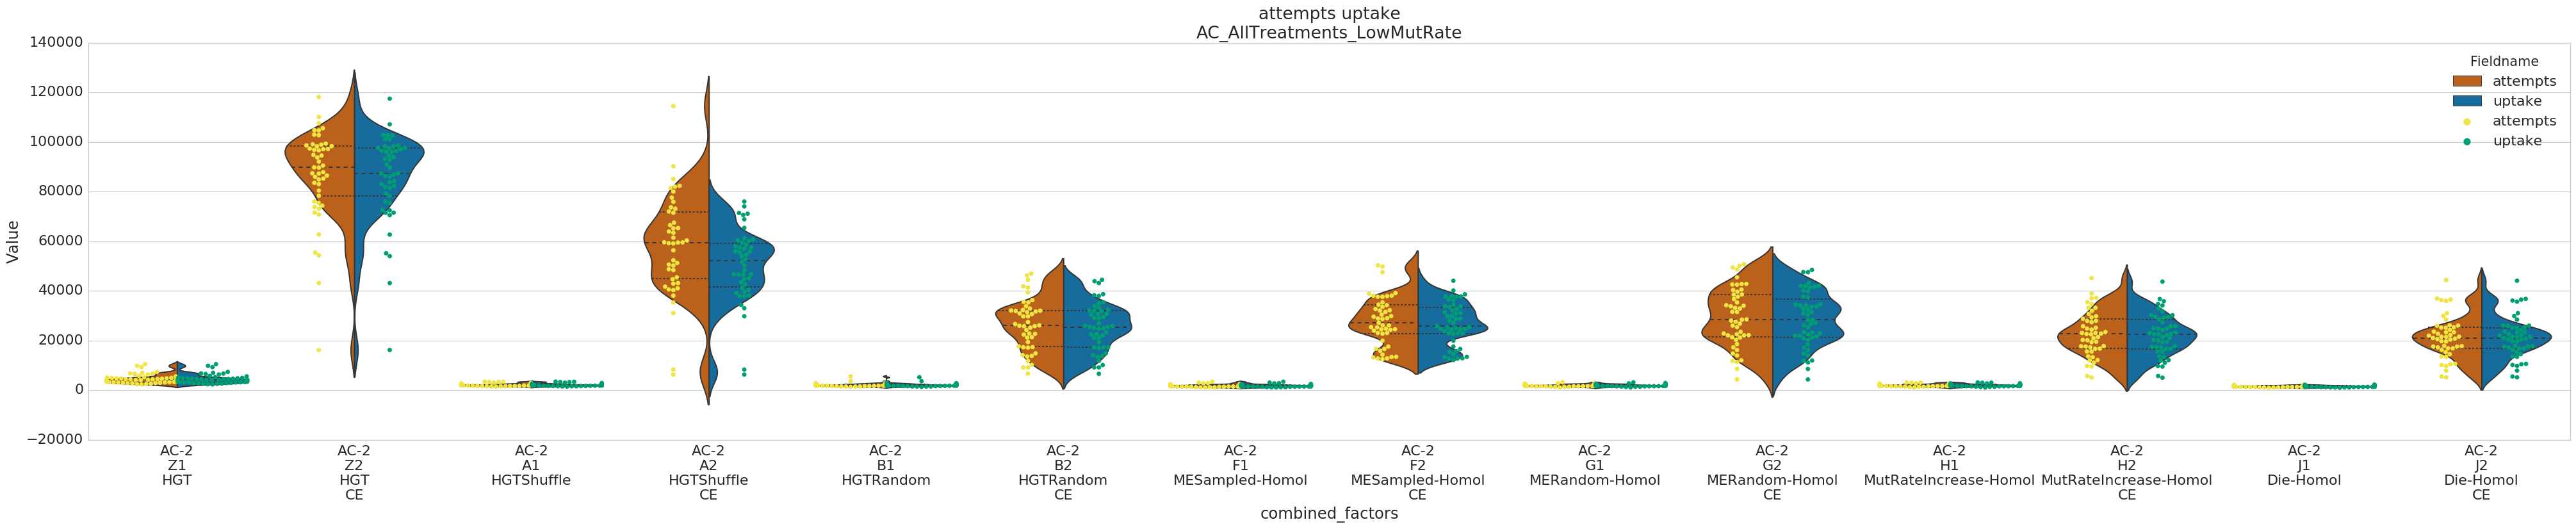

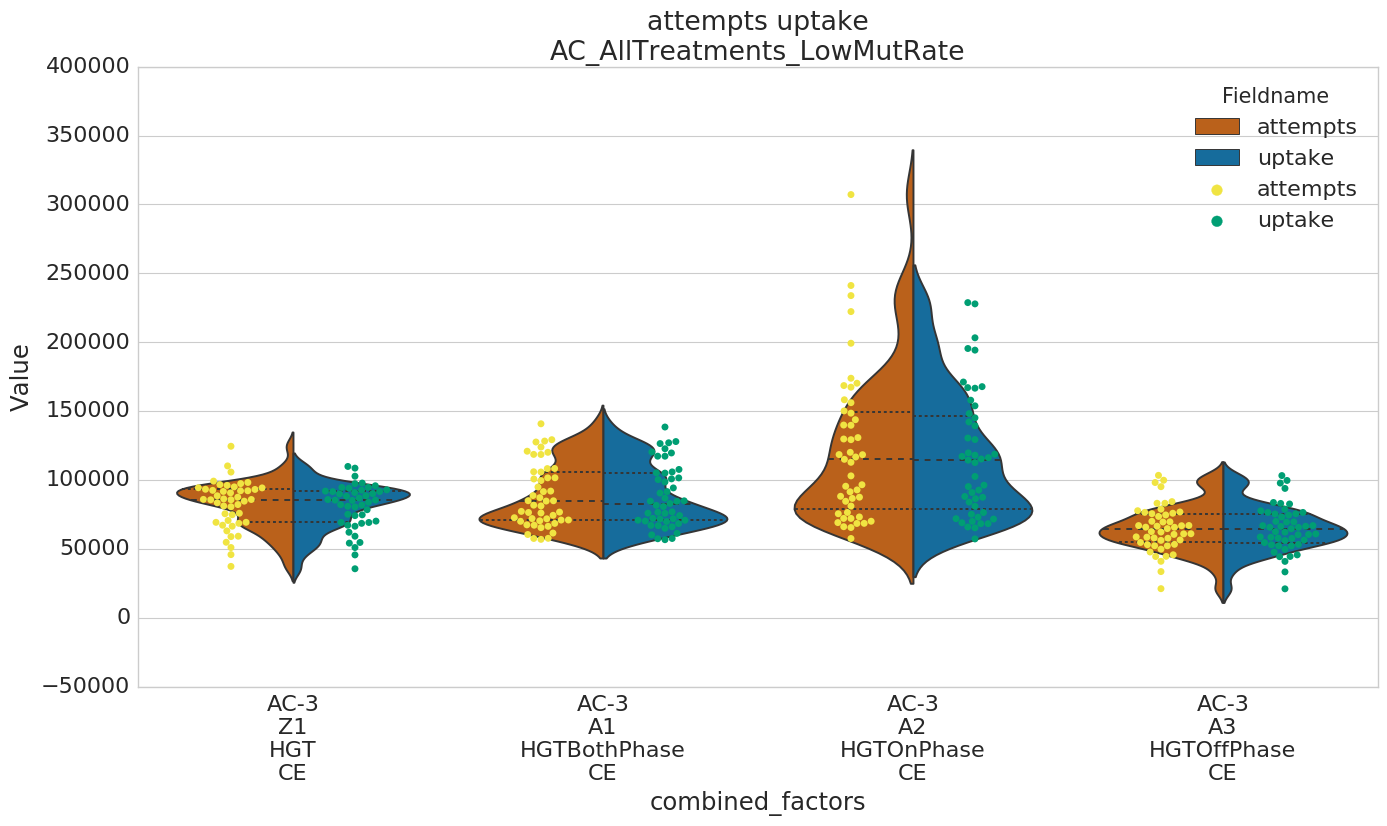

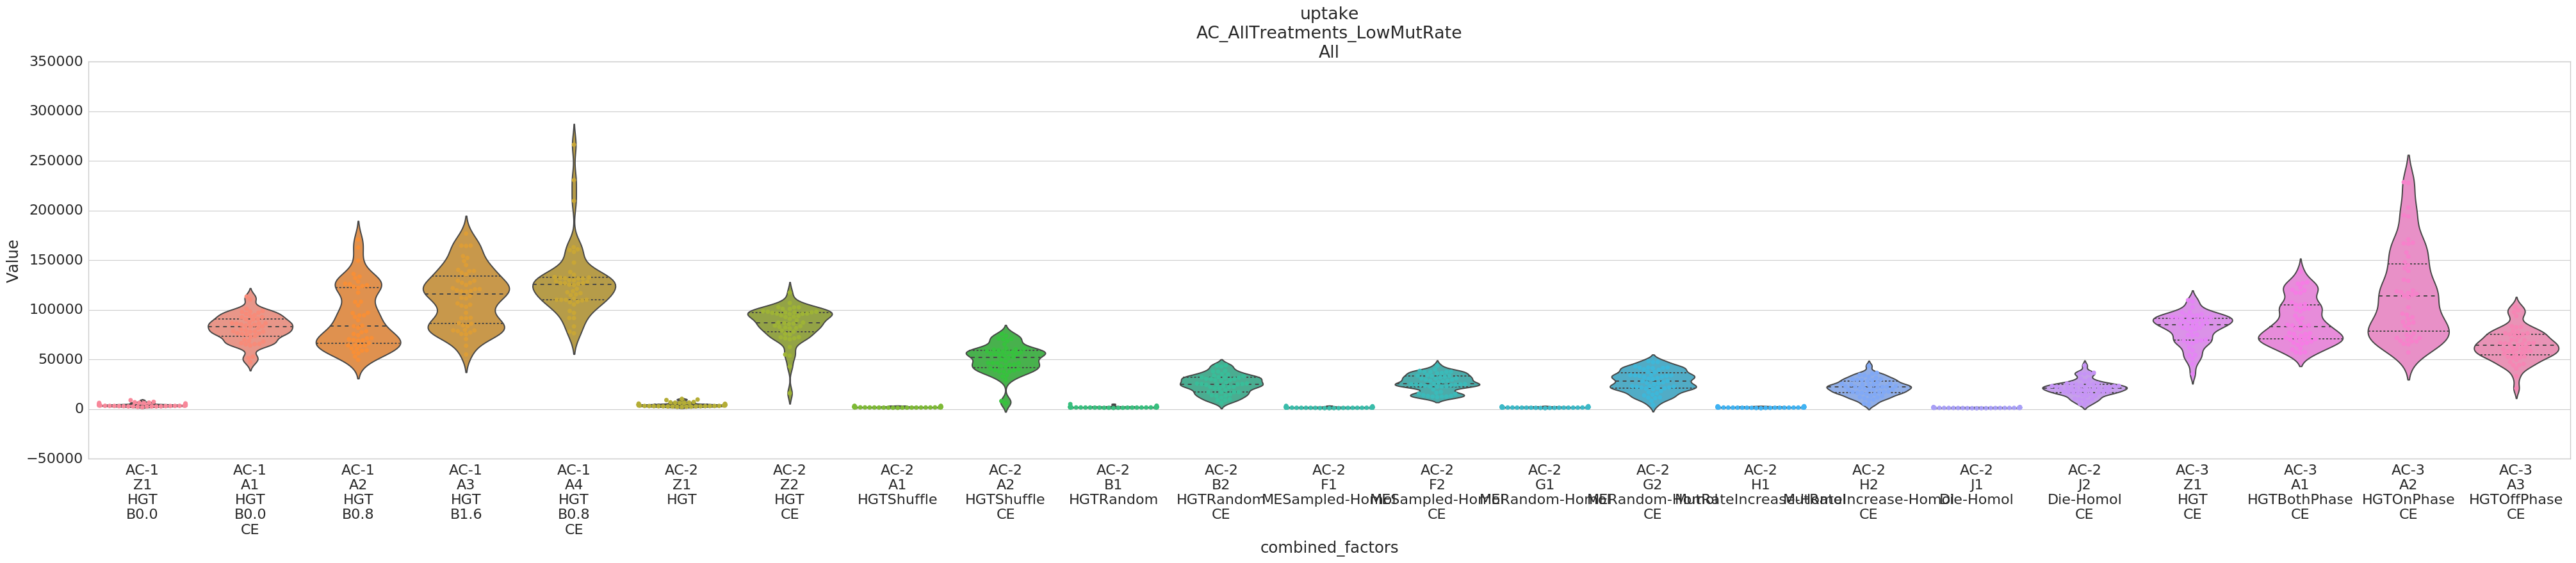

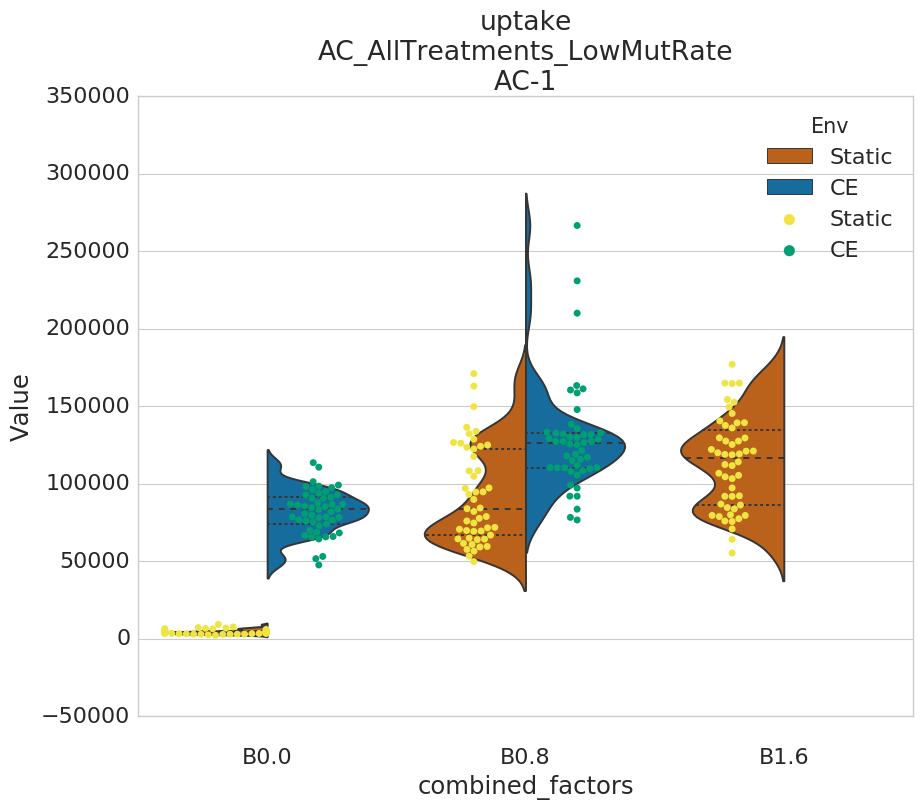

         Value        Label  Flavor  Limit MutType     Env Fieldname
0  5230.545727  AC-2_Z1_HGT  Intact  Homol     HGT  Static    uptake
1  4621.804598  AC-2_Z1_HGT  Intact  Homol     HGT  Static    uptake
2  2523.912044  AC-2_Z1_HGT  Intact  Homol     HGT  Static    uptake
3  3282.093953  AC-2_Z1_HGT  Intact  Homol     HGT  Static    uptake
4  2788.143928  AC-2_Z1_HGT  Intact  Homol     HGT  Static    uptake


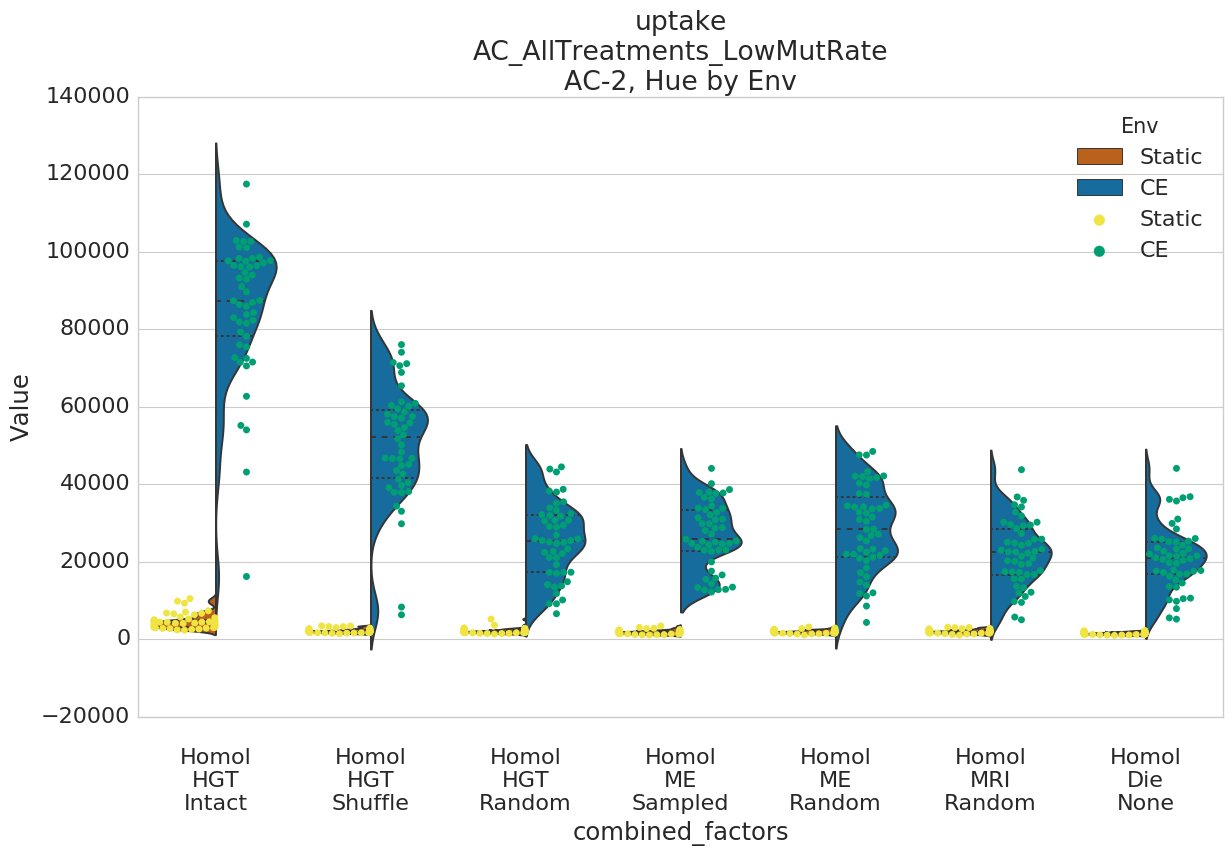

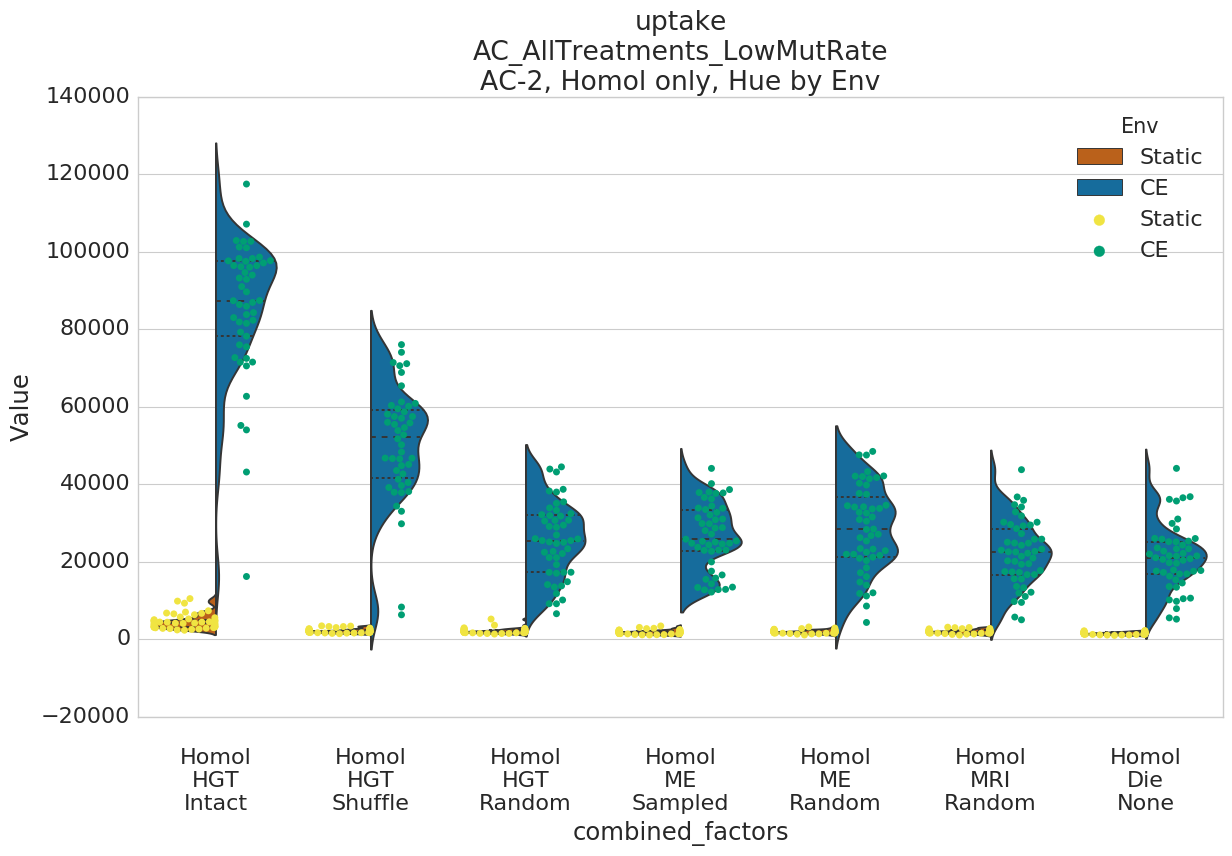

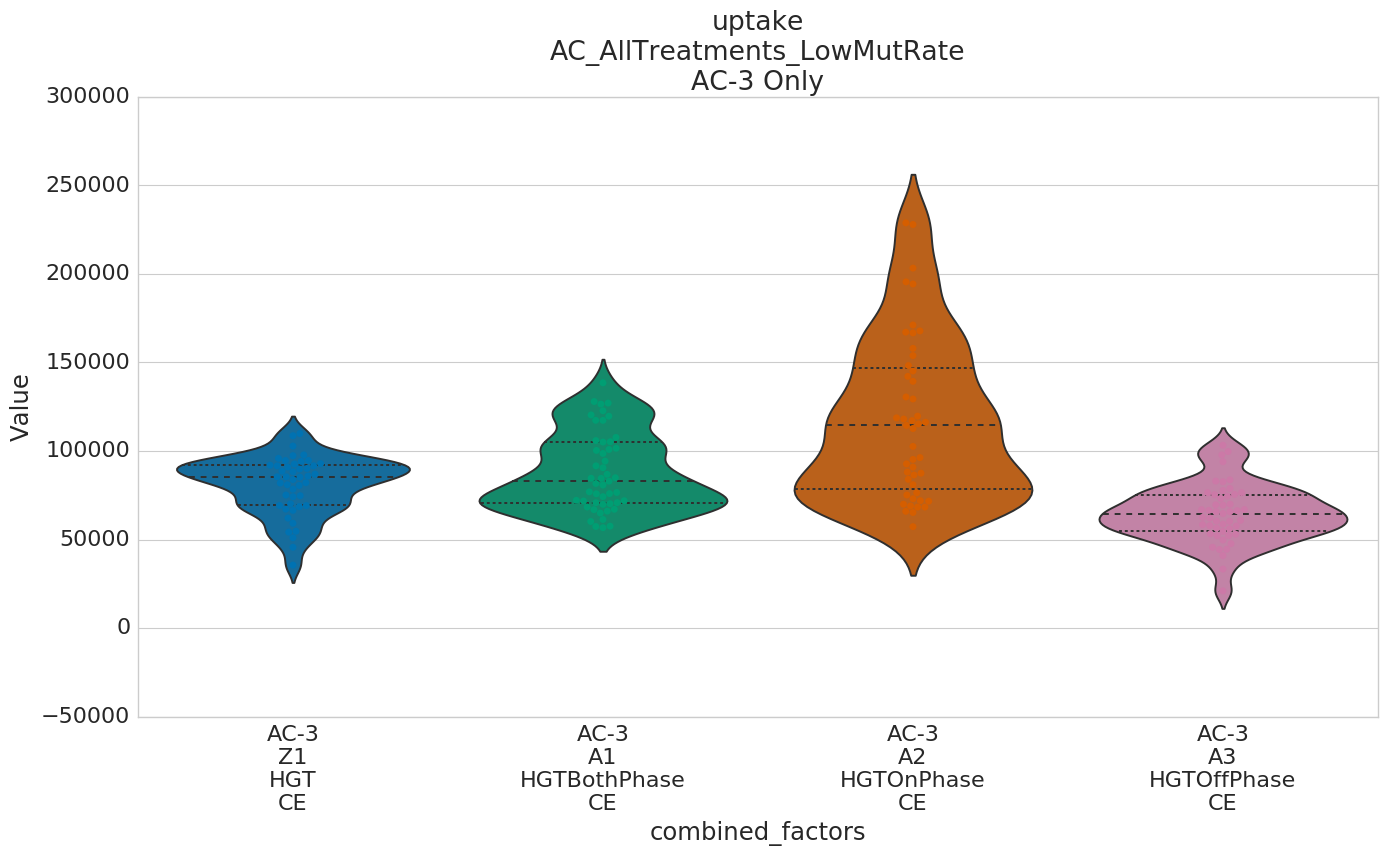

In [47]:
def test_basic_violin(treatments):

    basic_violin(treatments, "fitness", width=40)
    #basic_violin(treatments, "fitness", hue='Factor 4', width=40)
    basic_violin(grab_set(series="AC-1", ts=treatments), "fitness")
    #basic_violin(grab_set(series="AC-2", ts=treatments), "fitness", hue="Factor 4", width=50)
    basic_violin(grab_set(series="AC-2", factor="Homol", ts=treatments), "fitness", width=50)
    basic_violin(grab_set(series="AC-3", ts=treatments), "fitness")

    datafile = "hgt.dat.gz"
    field = "7"
    fieldname = 'uptake'
    
    extract_stats(treatments, datafile, "uptake", 7, verbose=False)
    extract_stats(treatments, datafile, "attempts", 10, verbose=False)
    
    basic_violin(grab_set(series="AC-1", ts=treatments), ["attempts", "uptake"])
    basic_violin(grab_set(series="AC-2", factor="Homol", ts=treatments), ["attempts", "uptake"], width=50)
    basic_violin(grab_set(series="AC-3", ts=treatments), ["attempts", "uptake"])      
    
    basic_violin(treatments, fieldname, width=50, title="All")

    basic_violin(grab_set(series="AC-1", ts=treatments), fieldname, title="AC-1", hue="Env", width=10)

    basic_violin(grab_set(series="AC-2", ts=treatments), fieldname, hue="Env", width=14, title="AC-2, Hue by Env", debug=True)
    basic_violin(grab_set(series="AC-2", factor="Homol", ts=treatments), fieldname, hue="Env", 
                 width=14, title="AC-2, Homol only, Hue by Env")

    basic_violin(grab_set(series="AC-3", ts=treatments), fieldname, title="AC-3 Only")
    
test_basic_violin(treatments)

#### Plot Fragment Effects (Flamegraph and Bar Plot)

##### Plot Flamegraph-ish Effects

In [183]:
def plot_flamegraph(dataframe, field, maxy=50, update_binsize=5, width=2, height=2, startmod=None, title=""):
    data = []

    start = dataframe.index.values.min()
    end = dataframe.index.values.max()
    
    print "start", start
    print "end", end
    
    if startmod:
        print "Limiting data to starting at:", startmod, "update"
        start = startmod

    binmax = int(dataframe.iloc[0:-1][field].max())
    binmin = int(dataframe.iloc[0:-1][field].min())
    
    print "binmax, binmin", binmax, binmin
    
    width = (binmax - binmin) / 5.0
    
    bins = np.linspace(binmin, binmax, maxy)
    #print bins
    
    #print update_binsize
    #print start,end
    
    minct = 0
    maxct = 0
    for i in range(start, end, update_binsize):
        #print "STEP", i
        arr = [0] * (len(bins)-1)
        for j in range(update_binsize):
            
            if i+j in dataframe.index:
                vals = dataframe.loc[i+j][field]
                c,d = np.histogram(vals, bins=bins)
                c = c.tolist()
                for x in range(len(bins)-1):
                    arr[x] += c[x]

        if max(arr) > maxct:
            maxct = max(arr)
        #data.append(arr)
        #data.append([math.log(x+1) for x in arr])
        data.append([x+1 for x in arr])
    fgdata = np.array(data)
    fgdata = np.transpose(fgdata)
    
    plt.rcParams['image.cmap'] = 'hot'
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=1)
    #plt.rcParams['figure.figsize'] = (width, height)
    
    #cmapthing = brewer2mpl.get_map('afmhot', 'Sequential (2)', 9).mpl_colormap
    #fg = plt.pcolor(fgdata)
    
    #print "WHAT", minct, maxct, fgdata
    #print LogNorm(vmin=minct, vmax=maxct)
    
    ppl.pcolormesh(fgdata,
                   cmap='hot',
                   norm=LogNorm(vmin=minct, vmax=maxct)
                  )

    
    interval = update_binsize
    
    xmin, xmax = plt.xlim()
    plt.ylim(0, len(bins))
    plt.xlim(0, len(data))
    
    ## set the x-ticks
    xlocs, xlabels = plt.xticks()
    xmodlabels = []
    xmodlocs = []
    #print xlocs
    for i in range(0, len(xlocs)):
        #value = 
        xmodlabels.append( '%sk' % float('%0.3g' % (int((start) + (xlocs[i]*interval))/1000.0)) )
        xmodlocs.append( xlocs[i] )

    plt.xticks( xmodlocs, xmodlabels,rotation=90 )

    ## set the y-ticks
#    ylocs, ylabels = plt.yticks()
    ylocs = [0, maxy*.25, maxy*.5, maxy*.75, maxy]
    plt.yticks( ylocs, np.linspace(binmin, binmax, len(ylocs)) )
    plt.xlabel( "Fragment Source Organism Birth (Updates)" )
    plt.ylabel( "Fitness Effect" )
    plt.title("Abundance of HGT Reservoir Fragments\nOrdered by Source Birth Time and Fitness Effect\n"+title)
    

begun reading files.
finished reading files.
start 188781
end 199001
binmax, binmin 513 -38


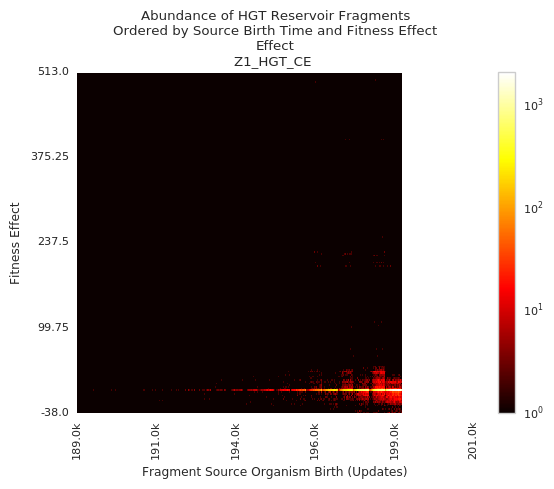

start 188781
end 199001
binmax, binmin 5091 -1


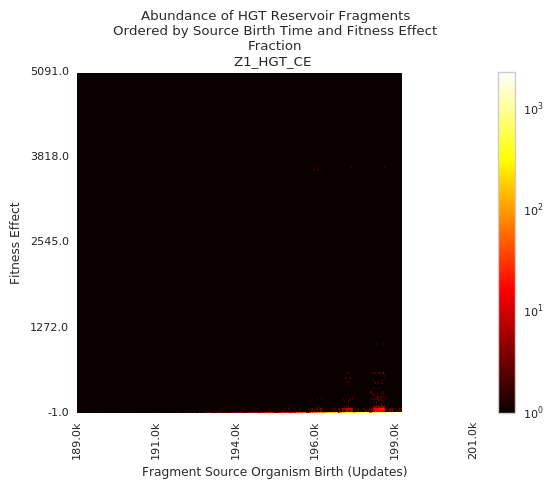

begun reading files.
finished reading files.
start 197999
end 199000
binmax, binmin 611 -528


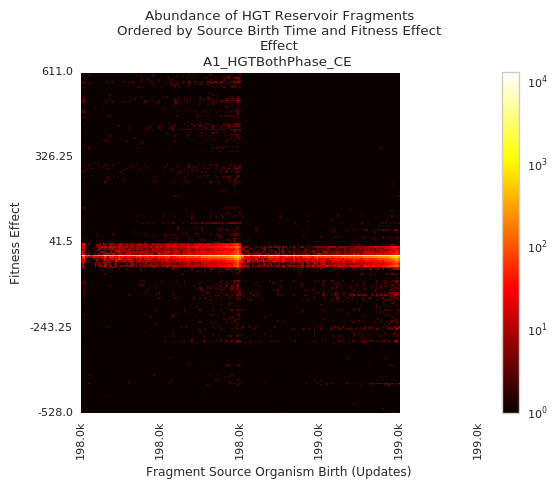

start 197999
end 199000
binmax, binmin 7424 -1


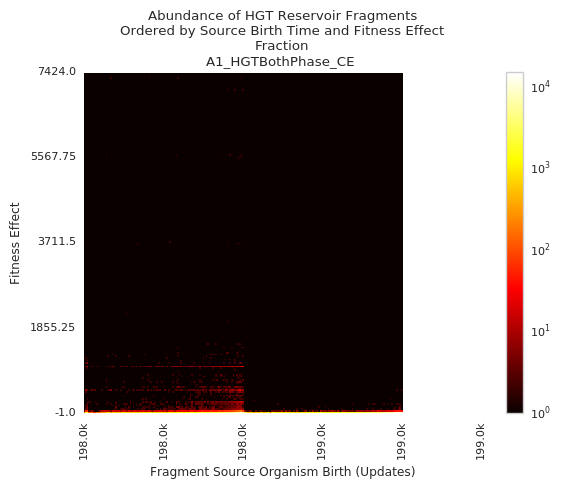

begun reading files.
finished reading files.
start 197979
end 198500
binmax, binmin 482 -43


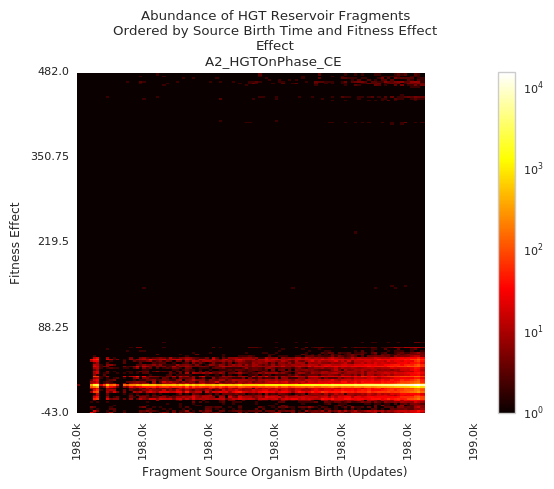

start 197979
end 198500
binmax, binmin 9702 -1


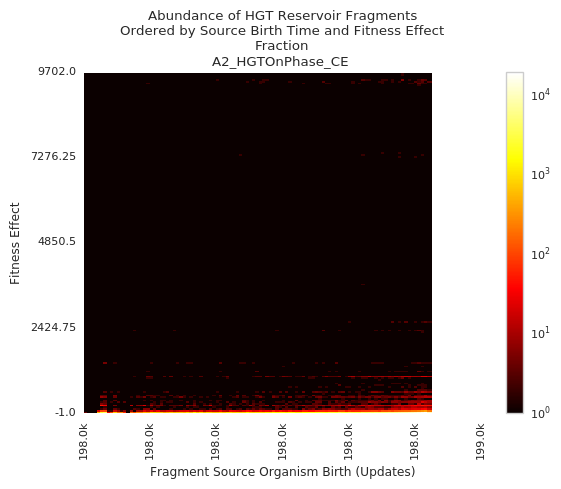

begun reading files.
finished reading files.
start 197016
end 199000
binmax, binmin 601 -595


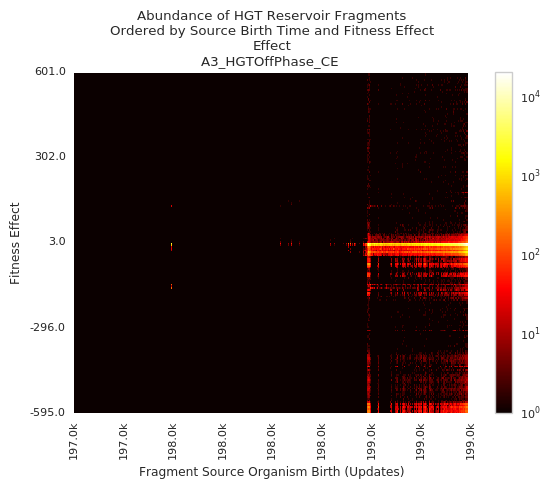

start 197016
end 199000
binmax, binmin 4416 -1


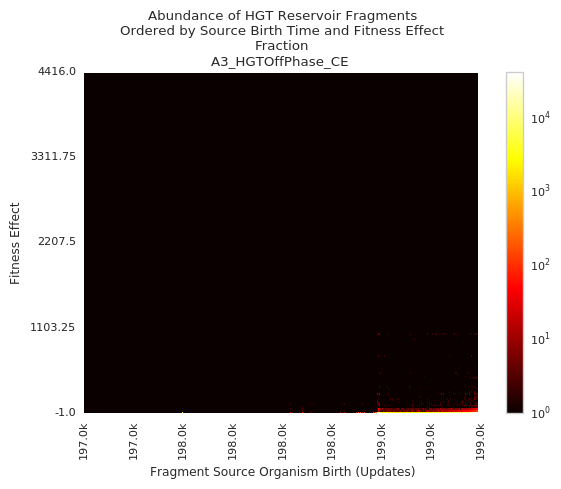

In [156]:
def test_plot_flamegraph(treatments):

    phase_treatments = grab_set(series="AC-3", ts=treatments)
#    phase_treatments = [treatments[t] for t in treatments if "AC-3" in t]
#    print phase_treatments
    for t in phase_treatments:
        df_t1 = read_fragment_effects(phase_treatments[t]['dir'], 'A_cycle_hgt_fitnessdist-199001.dat') 
        #df_t1 = df_t1.sample(100000)
        df_t1 = df_t1.replace([np.inf, -np.inf], np.nan)
        df_t1 = df_t1.dropna()
        #print df_t1.describe()
        #print df_t1
        plot_flamegraph(df_t1, field="effect", maxy=200, update_binsize=5, title="Effect\n"+phase_treatments[t]['longlabel']+" ")
        plt.show()
        plot_flamegraph(df_t1, field="fraction", maxy=200, update_binsize=5, title="Fraction\n"+phase_treatments[t]['longlabel']+" ")
        plt.show()
            
test_plot_flamegraph(treatments)            

##### Plot Fragment Effects (Bar or Violin)

In [184]:
def plot_fragment_effects(dataframe, field, title="", plot="bar"):

    bigframe = dataframe   
    
    bigframe['treatment'] = bigframe['Label'].apply(lambda row: "\n".join(row.split("_")))
    
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=2)
    plt.rcParams['figure.figsize'] = (20, 8)
    sns.plt.title("Fragment Effects\n"+title)
    if plot=="bar":
        sns.barplot(x="treatment", y=field, 
                       data=bigframe, 
                       )
    else:
        sns.violinplot(x="treatment", y=field, 
                   data=bigframe, 
                   scale="count", scale_hue=False, bw=.3,
                   inner="quart", 
                   )

    plt.show()
    

    
    

In [ ]:
def test_plot_fragment_effects(treatments):    
    
    #ac2_df = collect_fragment_effects_data(grab_set(series="AC-2", ts=treatments))
    ac3_df = collect_fragment_effects_data(grab_set(series="AC-3", ts=treatments))
    
    
#     plot_fragment_effects(ac2_df, field="effect", title="AC-2 - Effect")
#     plot_fragment_effects(ac2_df, field="effect", plot="violin", title="AC-2 - Effect")
#     plot_fragment_effects(ac2_df, field="fraction", title="AC-2 - Fraction")
#     plot_fragment_effects(ac2_df, field="fraction", plot="violin", title="AC-2 - Fraction")
    
    plot_fragment_effects(ac3_df, field="effect", title="AC-3 - Effect")
    plot_fragment_effects(ac3_df, field="effect", plot="violin", title="AC-3 - Effect")
    plot_fragment_effects(ac3_df, field="fraction", title="AC-3 - Fraction")
    plot_fragment_effects(ac3_df, field="fraction", plot="violin", title="AC-3 - Fraction")
    
test_plot_fragment_effects(treatments)

AC-3_Z1_HGT_CE
begun reading files.
finished reading files.
AC-3_A1_HGTBothPhase_CE
begun reading files.
finished reading files.
AC-3_A2_HGTOnPhase_CE
begun reading files.
finished reading files.
AC-3_A3_HGTOffPhase_CE
begun reading files.
finished reading files.


KeyboardInterrupt: 

##### Plot Beneficial Phenotype Change

In [185]:
def plot_fragment_phenotype_change(ts, filename='A_cycle_hgt_fitnessdist-199001.dat', title="", 
                                   incl_neutral=False, negative=False):
    
    bigframe = collect_fragment_phenotype_change(ts, filename, incl_neutral, negative)
    
    sns.set(style="whitegrid", color_codes=True, palette="colorblind")
    sns.set_context('paper', font_scale=2)
    plt.rcParams['figure.figsize'] = (20, 8)
    sns.plt.title("Proportion of Fragment Conveying Beneficial Phen Change\n"+filename+"\n"+title)
    sns.violinplot(x="treatment", y="frac_ben", 
                   data=bigframe, 
                   scale="count", scale_hue=False, bw=.3,
                   inner="quart", 
                   )
    plt.show()
    

AC-3_Z1_HGT_CE
begun reading files.
finished reading files.
AC-3_A1_HGTBothPhase_CE
begun reading files.
finished reading files.
AC-3_A2_HGTOnPhase_CE
begun reading files.
finished reading files.
AC-3_A3_HGTOffPhase_CE
begun reading files.
finished reading files.


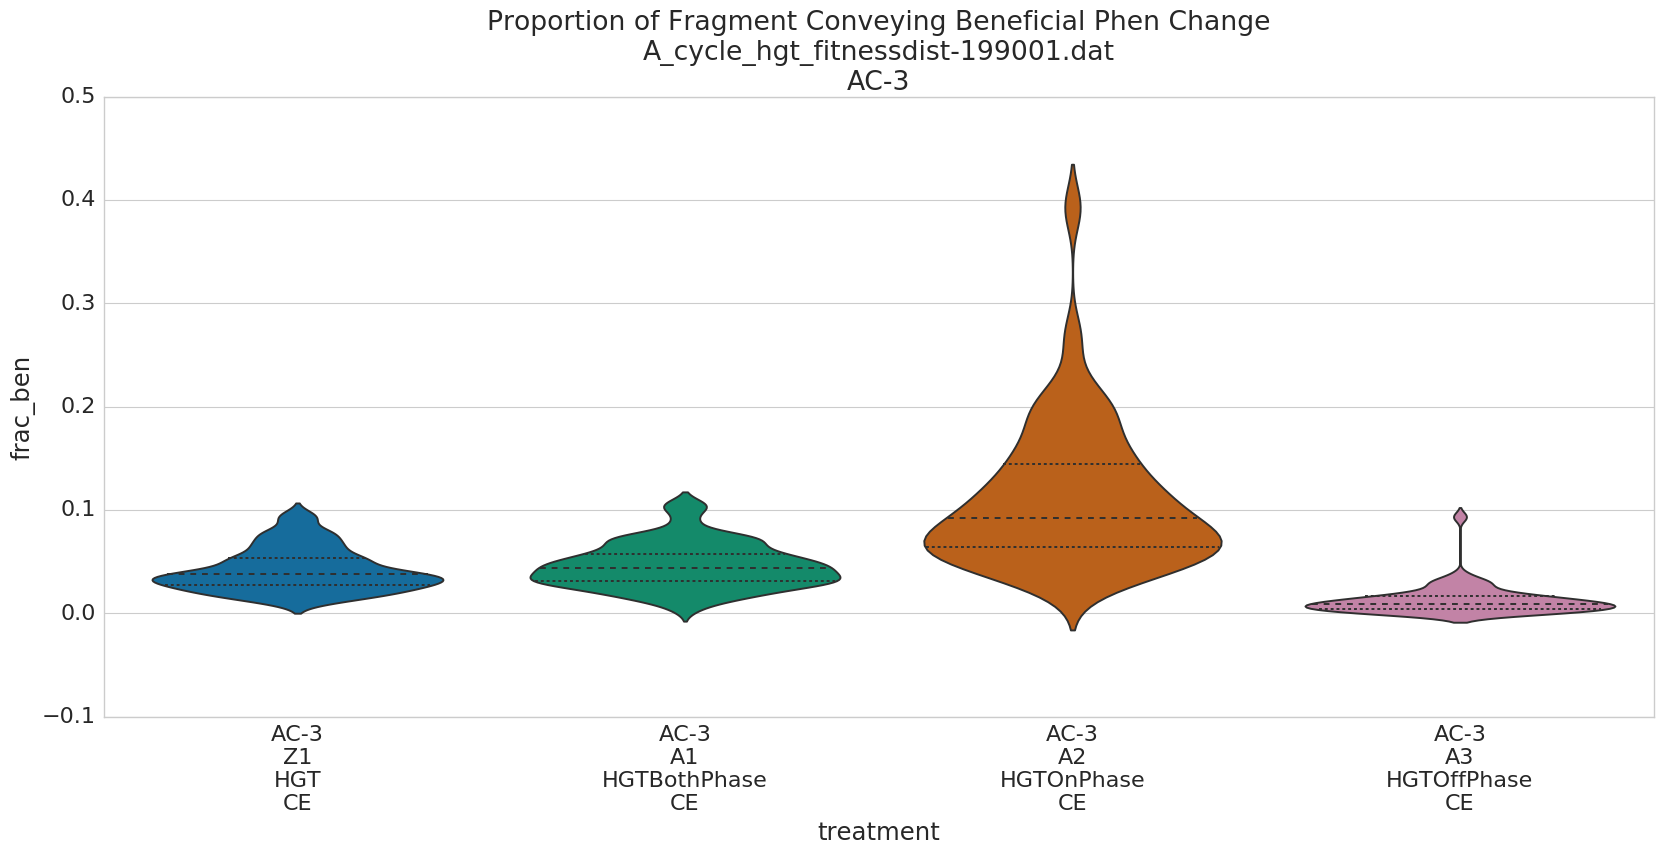

In [176]:
def test_plot_fragment_phenotype_change(treatments):    
    #plot_fragment_effects(grab_set(series="AC-1", ts=treatments),title="AC-1")
    #plot_fragment_effects(grab_set(series="AC-2", ts=treatments), title="AC-2")
    #plot_fragment_phenotype_change(grab_set(series="AC-2", factor="Homol", ts=treatments), title="AC-2, Homol only")
    plot_fragment_phenotype_change(grab_set(series="AC-3", ts=treatments), title="AC-3")      
    
test_plot_fragment_phenotype_change(treatments)

## Data Setup - EDIT ME

In [186]:
data_name = "BA_Die_CE_vs_Bottleneck"


treatments = collections.OrderedDict()

add_treatment(treatments, series="BA-1", seed="300", name="A1_Die-Homol", 
              factors={'MutType': "Die",'Flavor': "None",'Limit': "Homol",'BottleRate':'None','Env':"Static"})
add_treatment(treatments, series="BA-1", seed="300", name="A2_Die-Homol_CE", 
              factors={'MutType': "Die",'Flavor': "None",'Limit': "Homol",'BottleRate':'None','Env':"CE"})

add_treatment(treatments, series="BA-1", seed="300", name="A3_Die-Homol_Bottleneck_0.5", 
              factors={'MutType': "Die",'Flavor': "0.5",'Limit': "Homol",'BottleRate':'0.5','Env':"Bottleneck"})
add_treatment(treatments, series="BA-1", seed="300", name="A4_Die-Homol_Bottleneck_0.9", 
              factors={'MutType': "Die",'Flavor': "0.9",'Limit': "Homol",'BottleRate':'0.9','Env':"Bottleneck"})
add_treatment(treatments, series="BA-1", seed="300", name="A5_Die-Homol_Bottleneck_0.99", 
              factors={'MutType': "Die",'Flavor': "0.99",'Limit': "Homol",'BottleRate':'0.99','Env':"Bottleneck"})
add_treatment(treatments, series="BA-1", seed="300", name="A6_Die-Homol_Bottleneck_0.995", 
              factors={'MutType': "Die",'Flavor': "0.995",'Limit': "Homol",'BottleRate':'0.995','Env':"Bottleneck"})

add_treatment(treatments, series="BA-1", seed="300", name="A7_Die-Homol_CE_Bottleneck_0.5", 
              factors={'MutType': "Die",'Flavor': "0.5",'Limit': "Homol",'BottleRate':'0.5','Env':"CE_Bottleneck"})
add_treatment(treatments, series="BA-1", seed="300", name="A8_Die-Homol_CE_Bottleneck_0.9", 
              factors={'MutType': "Die",'Flavor': "0.9",'Limit': "Homol",'BottleRate':'0.9','Env':"CE_Bottleneck"})
add_treatment(treatments, series="BA-1", seed="300", name="A9_Die-Homol_CE_Bottleneck_0.99", 
              factors={'MutType': "Die",'Flavor': "0.99",'Limit': "Homol",'BottleRate':'0.99','Env':"CE_Bottleneck"})
add_treatment(treatments, series="BA-1", seed="300", name="A10_Die-Homol_CE_Bottleneck_0.995", 
              factors={'MutType': "Die",'Flavor': "0.995",'Limit': "Homol",'BottleRate':'0.995','Env':"CE_Bottleneck"})

add_treatment(treatments, series="BA-1", seed="300", name="A11_Die-Homol_SerialTransfer", 
              factors={'MutType': "Die",'Flavor': "1",'Limit': "Homol",'BottleRate':'None','Env':"SerialTransfer"})
add_treatment(treatments, series="BA-1", seed="300", name="A12_Die-Homol_SerialTransfer", 
             factors={'MutType': "Die",'Flavor': "2",'Limit': "Homol",'BottleRate':'None','Env':"SerialTransfer"})
add_treatment(treatments, series="BA-1", seed="300", name="A13_Die-Homol_SerialTransfer", 
             factors={'MutType': "Die",'Flavor': "4",'Limit': "Homol",'BottleRate':'None','Env':"SerialTransfer"})
add_treatment(treatments, series="BA-1", seed="300", name="A14_Die-Homol_SerialTransfer", 
             factors={'MutType': "Die",'Flavor': "8",'Limit': "Homol",'BottleRate':'None','Env':"SerialTransfer"})

INITIAL_IMPORT=True


In [187]:
## Call the init methods 
skipchecks = not INITIAL_IMPORT
setup_analysis_path(treatments, base_path="/Core/home/rosiec/__research/HGT/raw_data/FinalData/", verbose=True)
prepare_analysis_directories(treatments, skipchecks=skipchecks, cleanup=True, verbose=True)

base_path: /Core/home/rosiec/__research/HGT/raw_data/FinalData/
scripts_path: ~/Dropbox/School_Docs/Research/research_scripts/
data_path: /Core/home/rosiec/__research/HGT/raw_data/FinalData/BA_Die_CE_vs_Bottleneck
analysis_path /Core/home/rosiec/__research/HGT/raw_data/FinalData/BA_Die_CE_vs_Bottleneck/analysis

Treatments:
['BA-1_A1_Die-Homol', 'BA-1_A2_Die-Homol_CE', 'BA-1_A3_Die-Homol_Bottleneck_0.5', 'BA-1_A4_Die-Homol_Bottleneck_0.9', 'BA-1_A5_Die-Homol_Bottleneck_0.99', 'BA-1_A6_Die-Homol_Bottleneck_0.995', 'BA-1_A7_Die-Homol_CE_Bottleneck_0.5', 'BA-1_A8_Die-Homol_CE_Bottleneck_0.9', 'BA-1_A9_Die-Homol_CE_Bottleneck_0.99', 'BA-1_A10_Die-Homol_CE_Bottleneck_0.995', 'BA-1_A11_Die-Homol_SerialTransfer', 'BA-1_A12_Die-Homol_SerialTransfer', 'BA-1_A13_Die-Homol_SerialTransfer', 'BA-1_A14_Die-Homol_SerialTransfer']

Values:
{'factors': {'BottleRate': 'None', 'Flavor': 'None', 'Limit': 'Homol', 'MutType': 'Die', 'Env': 'Static'}, 'series': 'BA-1', 'filename': None, 'shortlabel': 'BA-1_A

# Init Complete Check

In [188]:
print "INIT COMPLETE"

INIT COMPLETE


# Scrap Code

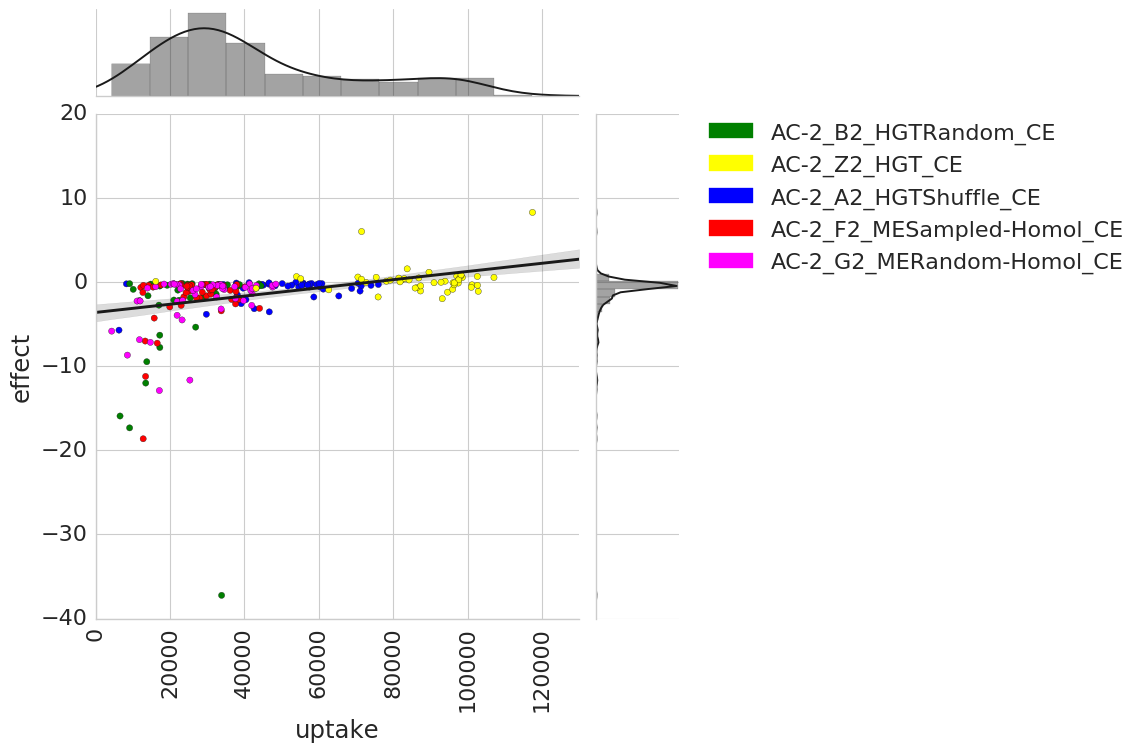

In [133]:


g = sns.jointplot(x="uptake", y="effect", data=merged_upt_fef,
                kind="reg", scatter=False,
                  annot_kws=dict(stat="r"),
                xlim=(0, 130000), ylim=(-40, 20), 
              color="k", size=7)
plt.xticks(rotation=90)
#sns.lmplot(x="uptake", y="effect", hue="Label", data=merged_upt_fef, fit_reg=False)
color_names = ['blue','green','red','magenta','yellow']
labels = list(merged_fef_means['Label'].unique())
colors = {}
for l,c in zip(labels,color_names):
    colors[l] = c

#colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}

#print g.ax_joint
g.ax_joint.scatter(merged_upt_fef['uptake'], merged_upt_fef['effect'], c=merged_upt_fef['Label'].apply(lambda x: colors[x]))

# There is no labels, need to define the labels
# Create the legend patches
legend_patches = [matplotlib.patches.Patch(color=colors[k], label=k) for k in colors.keys()]
#legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
#                  C, L in zip([item.get_facecolor() for item in Boxes],
#                              legend_labels)]

# Plot the legend
lg = plt.legend(handles=legend_patches, 
           bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.)
plt.show()
#plt.title(lg, "BOOP")